# Observation
BCG-- its an Boston Consultant Group it is to proivide Ai and ML servies to different clients

PowerCo -- The company is to provide gas and electricity to the customere [Client]

Problem Statement--- The client is loosing customers 
They have provided two datasets

# Price Columns Details
  price_off_peak_var--Cost of unit price when customer using electricity in un-peack times

  price_peak_var --- Cost of  unit price when customer using peack times

  price_mid_peak_var--Cost of unit price when customer using mid-peak times

------------------------------------------------------------------------------------------------
 price_off_peak_fix-- The fixed cost during off-peak times.

 price_peak_fix-- The fixed cost during peak times.

 price_mid_peak_fix-- The fixed cost during mid-peak times.


# Client Columns details

id: A unique identifier for each client or company.

activity_new: The category or type of business the company is involved in.

channel_sales: The sales channel or method used to reach the customer, represented by a code.

cons_12m: The total electricity consumption over the past 12 months.

cons_gas_12m: The total gas consumption over the past 12 months.

cons_last_month: The electricity consumption during the last month.

date_activ: The date when the customer’s contract started.

date_end: The date when the customer’s contract is set to end.

date_modif_prod: The last date when the customer’s product or service was modified.

date_renewal: The next scheduled date for contract renewal.

forecast_cons_12m: The predicted electricity consumption for the next 12 months.

forecast_cons_year: The predicted electricity consumption for the upcoming calendar year.

forecast_discount_energy: The expected value of the discount the customer will receive.

forecast_meter_rent_12m: The expected cost of meter rental for the next 12 months.

forecast_price_energy_off_peak: The predicted cost per unit of electricity (e.g., per kWh) during off-peak hours (times when demand is lower, such as late night or early morning).

forecast_price_energy_peak: The predicted cost per unit of electricity during peak hours (times when demand is high, like evenings).

forecast_price_pow_off_peak: The predicted price of power during off-peak hours.

has_gas: Indicates whether the customer also has a gas subscription (Yes/No).

imp_cons: The amount of energy currently paid for by the customer(if customer used 300kw he has paid 500)

margin_gross_pow_ele: The gross profit from the customer’s power subscription.(Means assume company revenue is 10,000 cost of goods is 6000 remaining amount is 4000 profit)

margin_net_pow_ele: The net profit from the customer’s power subscription. (Means total profit excluding taxes,salaries...etc , assume company revenue is 10,000 cost of goods is 6000  and salaries and taxes is 1000 remaing amount is profit 3000)


nb_prod_act: The number of active products or services the customer has subscribed to.

net_margin: The total net profit from the customer.(for each customer how much profit got to company)

num_years_antig: How long the customer has been with the company (in years).

origin_up: The campaign code used to sign up the customer for electricity services.(How customer sign up throgh door to door or marketing social media campaign)

# Importing Required Modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reading the file

In [7]:
price=pd.read_csv("price_data (1).csv")
client=pd.read_csv("client_data (1).csv")

In [8]:
price.shape

(193002, 8)

# Observation
 Price Data contains
 
 193002 Rows
 
 8 columns

In [10]:
client.shape

(14606, 26)

# Observation
client Data contains 

14606 Rows 

26 Column

In [12]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [13]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [14]:
price.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [15]:
price.duplicated().sum()

0

# Observation:
There is no null and duplicated values in the price data frame

In [17]:
client.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [18]:
client.duplicated().sum()

0

# Observation :
There is Null and duplicated values in client data frame

In [20]:
price.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


In [21]:
price['price_date']=pd.to_datetime(price['price_date'])         

In [22]:
price['Year']=price['price_date'].dt.year                 

In [23]:
price['Month']=price['price_date'].dt.month          

In [24]:
price['Day']=price['price_date'].dt.day          

In [25]:
price.drop(columns=['price_date'],inplace=True)

In [26]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_off_peak_var  193002 non-null  float64
 2   price_peak_var      193002 non-null  float64
 3   price_mid_peak_var  193002 non-null  float64
 4   price_off_peak_fix  193002 non-null  float64
 5   price_peak_fix      193002 non-null  float64
 6   price_mid_peak_fix  193002 non-null  float64
 7   Year                193002 non-null  int32  
 8   Month               193002 non-null  int32  
 9   Day                 193002 non-null  int32  
dtypes: float64(6), int32(3), object(1)
memory usage: 12.5+ MB


In [27]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [28]:
client['date_activ']=pd.to_datetime(client['date_activ'])                                           

In [29]:
client['active_year']=client['date_activ'].dt.year                      

In [30]:
client['active_month']=client['date_activ'].dt.month                     

In [31]:
client['active_day']=client['date_activ'].dt.day                      

In [32]:
client['date_end'] =pd.to_datetime(client['date_end'])                                               

In [33]:
client['end_year']=client['date_end'].dt.year                       

In [34]:
client['end_month']=client['date_end'].dt.month                        

In [35]:
client['end_day']=client['date_end'].dt.day                        

In [36]:
client['date_modif_prod']

0        2015-11-01
1        2009-08-21
2        2010-04-16
3        2010-03-30
4        2010-01-13
            ...    
14601    2015-05-08
14602    2012-08-27
14603    2012-02-08
14604    2012-08-30
14605    2009-12-18
Name: date_modif_prod, Length: 14606, dtype: object

In [37]:
client['date_modif_prod']=pd.to_datetime(client['date_modif_prod'])                               

In [38]:
client['Condition_modified_year']=client['date_modif_prod'].dt.year                 

In [39]:
client['Condition_modified_month']=client['date_modif_prod'].dt.month                 

In [40]:
client['Condition_modified_day']=client['date_modif_prod'].dt.month                 

In [41]:
client['date_renewal']=pd.to_datetime(client['date_renewal'])                                        

In [42]:
client['Customer_renewal_year']=client['date_renewal'].dt.year                    

In [43]:
client['Customer_renewal_month']=client['date_renewal'].dt.month                   

In [44]:
client['Customer_renewal_day']=client['date_renewal'].dt.day                    

In [45]:
client.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'],inplace=True)                              

In [46]:
client.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [47]:
price[price['price_peak_var']==0.000000].any()

id                     True
price_off_peak_var     True
price_peak_var        False
price_mid_peak_var    False
price_off_peak_fix     True
price_peak_fix         True
price_mid_peak_fix     True
Year                   True
Month                  True
Day                    True
dtype: bool

In [48]:
numerical_data=price.select_dtypes(include=['number','object']).columns
for col in numerical_data:
    numerical=price[col].value_counts()
    print(f'The value counts of is',numerical)
    print('******'*20)
    print('\n')


The value counts of is id
038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: count, Length: 16096, dtype: int64
************************************************************************************************************************


The value counts of is price_off_peak_var
0.152445    6291
0.151367    5652
0.125976    5139
0.127566    4373
0.147600    4285
            ... 
0.140656       1
0.124354       1
0.149091       1
0.119542       1
0.124808       1
Name: count, Length: 1853, dtype: int64
****************************************************************************************************************

In [49]:
price[['price_peak_var','price_mid_peak_var','price_peak_fix','price_mid_peak_fix']].isnull().sum()

price_peak_var        0
price_mid_peak_var    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [50]:
numerical_columns=client.select_dtypes(include='number').columns
for col in numerical_columns:
    numerical=client[col].value_counts()
    print(f'The value counts of numerical',numerical)
    print("********"*15)
    print('\n')

The value counts of numerical cons_12m
0          117
2882597     27
3329244     24
1743025     18
3926060     18
          ... 
22927        1
2630         1
6346         1
7985         1
7223         1
Name: count, Length: 11065, dtype: int64
************************************************************************************************************************


The value counts of numerical cons_gas_12m
0          11994
976731        27
867921        24
41532         18
1959386       18
           ...  
39211          1
92364          1
8905           1
8125           1
47940          1
Name: count, Length: 2112, dtype: int64
************************************************************************************************************************


The value counts of numerical cons_last_month
0         4983
382647      27
509826      24
558120      18
469210      18
          ... 
202          1
30084        1
7190         1
17336        1
11367        1
Name: count, Length: 4751, d

In [51]:
client[['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year',
                            'forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_peak','imp_cons','net_margin','churn']].dtypes

cons_12m                        int64
cons_gas_12m                    int64
cons_last_month                 int64
forecast_cons_12m             float64
forecast_cons_year              int64
forecast_discount_energy      float64
forecast_meter_rent_12m       float64
forecast_price_energy_peak    float64
imp_cons                      float64
net_margin                    float64
churn                           int64
dtype: object

# Observation:
The data cleaned now

we have converted datetime and extracted year month date separetely


# Visualization

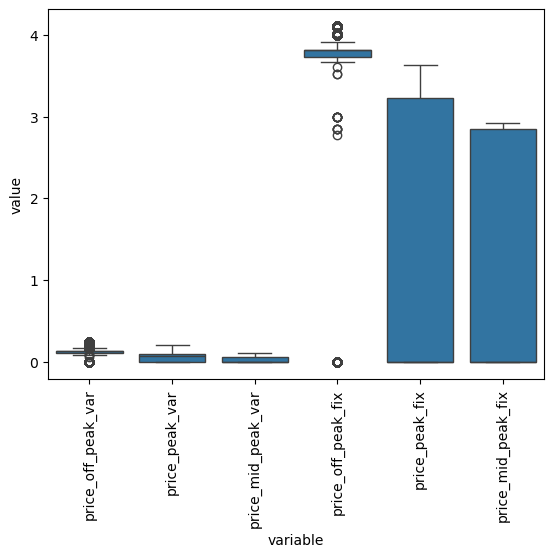

In [54]:
number=price.drop(columns=['id','Year','Month','Day'])
transform_price=number.apply(np.log1p)
transform_reshape=transform_price.melt()
sns.boxplot(x='variable',y='value',data=transform_reshape)
plt.xticks(rotation=90)
plt.show()

In [55]:
price[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']]=transform_price

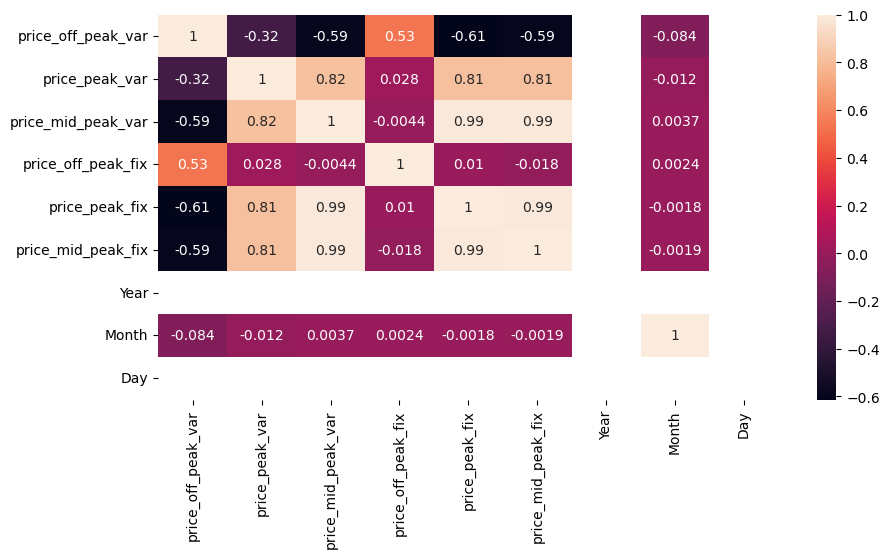

In [56]:
numerical_columns=price.select_dtypes(include='number')
relation_columns=numerical_columns.corr()
plt.figure(figsize=(10,5))
sns.heatmap(relation_columns,annot=True)
plt.show()

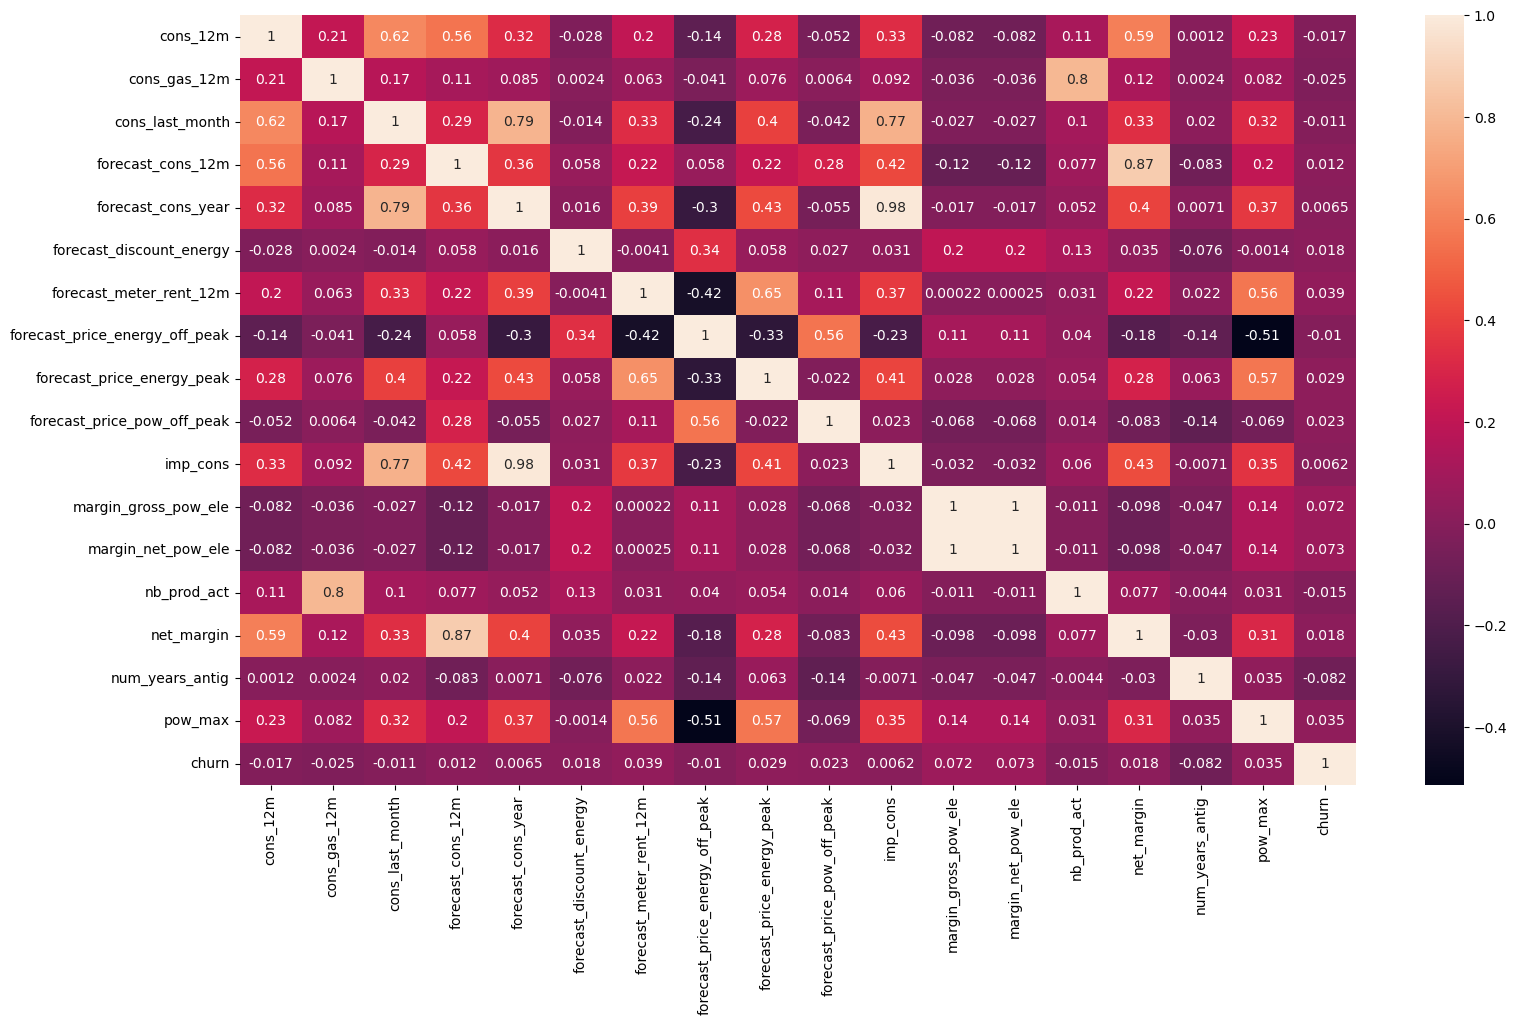

In [57]:
number=client.drop(columns=['id','id','active_year', 'active_month', 'active_day', 'end_year', 'end_month',
       'end_day', 'Condition_modified_year', 'Condition_modified_month',
       'Condition_modified_day', 'Customer_renewal_year',
       'Customer_renewal_month', 'Customer_renewal_day','channel_sales'])
numerical_columns=number.select_dtypes(include='number')
transform_client=numerical_columns.apply(np.log1p)
relation_number=transform_client.corr()
plt.figure(figsize=(18,10))
sns.heatmap(data=relation_number,annot=True)
plt.show()

# Statistics

The column name is price_off_peak_var


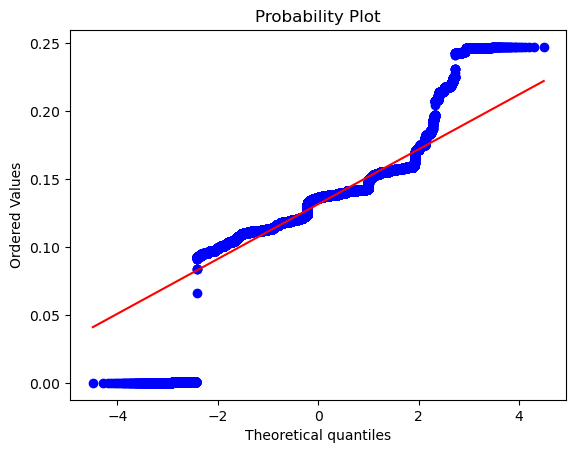

************************************************************************************************************************
The column name is price_peak_var


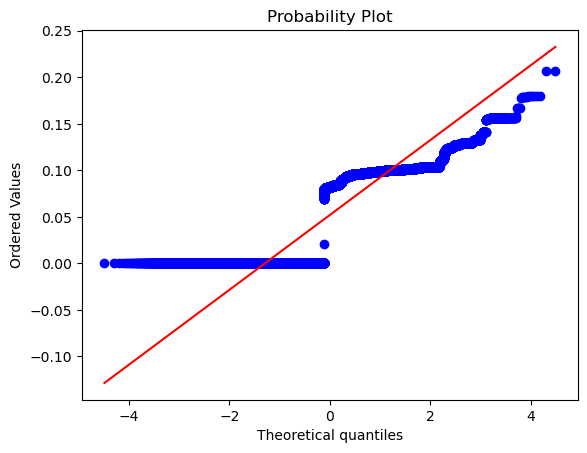

************************************************************************************************************************
The column name is price_mid_peak_var


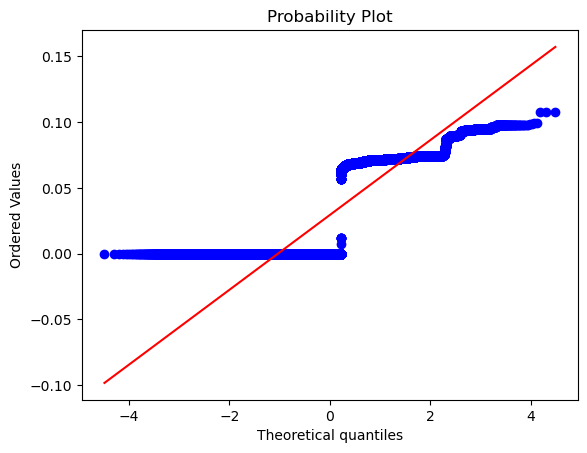

************************************************************************************************************************
The column name is price_off_peak_fix


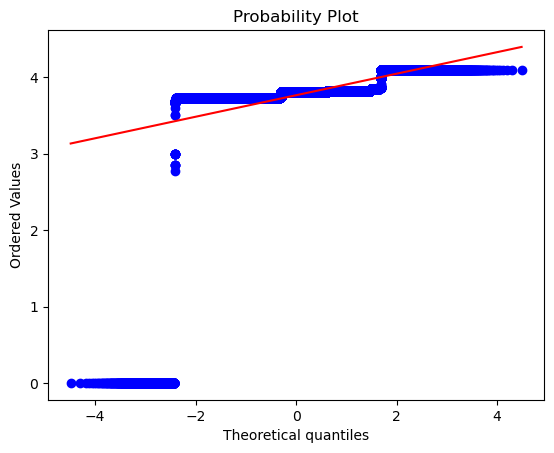

************************************************************************************************************************
The column name is price_peak_fix


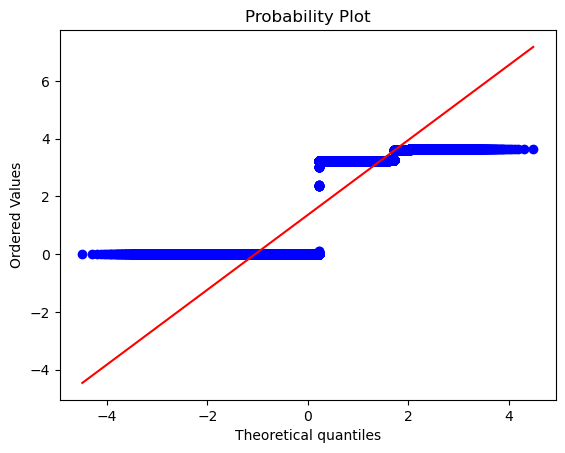

************************************************************************************************************************
The column name is price_mid_peak_fix


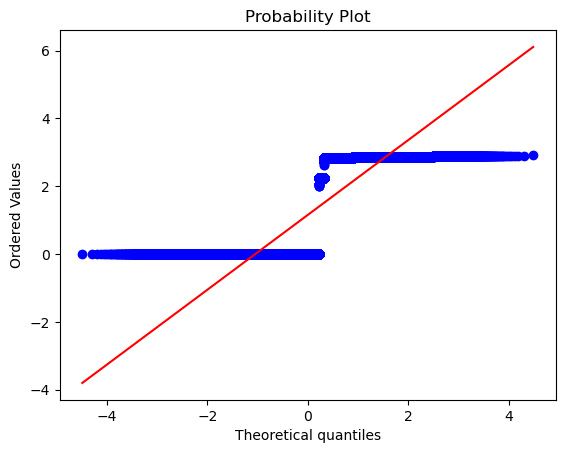

************************************************************************************************************************


In [59]:
for col in transform_price:
    stats.probplot(price[col],dist=stats.norm,plot=plt)
    print(f'The column name is {col}')
    plt.show()
    print("******"*20)

In [60]:
def chi_square_good_fit(observed_frequency,expected_frequency,significance_level):
    stat,p_value=stats.chisquare(observed_frequency,expected_frequency)
    print(f'The stats value is :{stat} \n The value of p is :{p_value}')
    if(p_value<significance_level):
        print('Reject Null Hypothesis (Ho)')
    else:
        print('Fail to reject null hypothesis (Ho)')
sample=price['Month'].sample(n=16094)
observed_frequency=sample.value_counts().to_list()
expected_frequency=[len(sample)/12]*12
chi_square_good_fit(observed_frequency,expected_frequency,significance_level=0.05)

The stats value is :7.876475705231762 
 The value of p is :0.7243244031051892
Fail to reject null hypothesis (Ho)


((array([3.59139250e-06, 8.71750976e-06, 1.38987934e-05, ...,
         9.99986101e-01, 9.99991282e-01, 9.99996409e-01]),
  array([ 1,  1,  1, ..., 12, 12, 12])),
 (11.916253135064947, 0.5430340422021409, 0.9965217154359729))

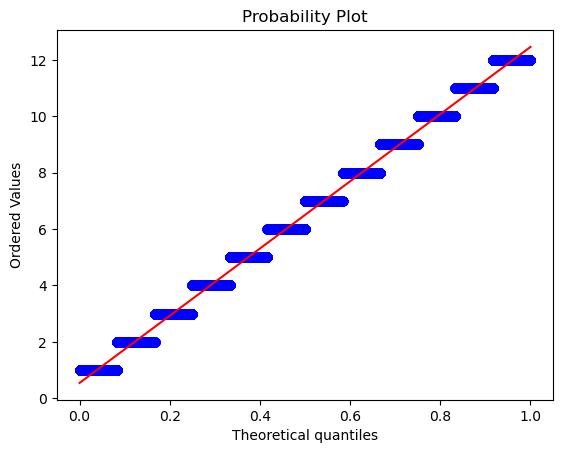

In [61]:
stats.probplot(price['Month'],dist=stats.uniform,plot=plt)

In [62]:
significance_level=0.05
stat,p_value=stats.kstest(price['price_off_peak_var'],'uniform')
print(f'The stats value is :{stat} \n The p_value is :{p_value}')
if(p_value<significance_level):
    print("Reject null hypothesis : Data is not uniformed distributed")
else:
    print("Fail to reject hypothesis: Data is uniform distributed")

The stats value is :0.8116962456971453 
 The p_value is :0.0
Reject null hypothesis : Data is not uniformed distributed


In [63]:
price

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Year,Month,Day
0,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,1,1
1,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,2,1
2,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,3,1
3,038af19179925da21a25619c5a24b745,0.139437,0.000000,0.000000,3.812577,0.000000,0.000000,2015,4,1
4,038af19179925da21a25619c5a24b745,0.139437,0.000000,0.000000,3.812577,0.000000,0.000000,2015,5,1
...,...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,8,1
192998,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,9,1
192999,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,10,1
193000,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,11,1


In [64]:
significance_level=0.05
stat,p_value=stats.kstest(price['Month'],'uniform')
print(f'The stats value is :{stat} \n The p_value is :{p_value}')
if(p_value<significance_level):
    print('Reject null hypothesis: it does not follow normal distribution')
else:
    print('Fail to reject null hypothesis : it follows normal distribution')



The stats value is :1.0 
 The p_value is :0.0
Reject null hypothesis: it does not follow normal distribution


In [65]:
client

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,active_day,end_year,end_month,end_day,Condition_modified_year,Condition_modified_month,Condition_modified_day,Customer_renewal_year,Customer_renewal_month,Customer_renewal_day
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2016,6,15,2015,11,11,2015,6,23
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,21,2016,8,30,2009,8,8,2015,8,31
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,16,2016,4,16,2010,4,4,2015,4,17
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,30,2016,3,30,2010,3,3,2015,3,31
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,13,2016,3,7,2010,1,1,2015,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,4648.01,0,0.0,18.57,0.138305,...,24,2016,5,8,2015,5,5,2014,5,26
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,631.69,181,0.0,144.03,0.100167,...,27,2016,8,27,2012,8,8,2015,8,28
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,190.39,179,0.0,129.60,0.116900,...,8,2016,2,7,2012,2,2,2015,2,9
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,19.34,0,0.0,7.18,0.145711,...,30,2016,8,30,2012,8,8,2015,8,31


The qq plot of columns is :cons_12m


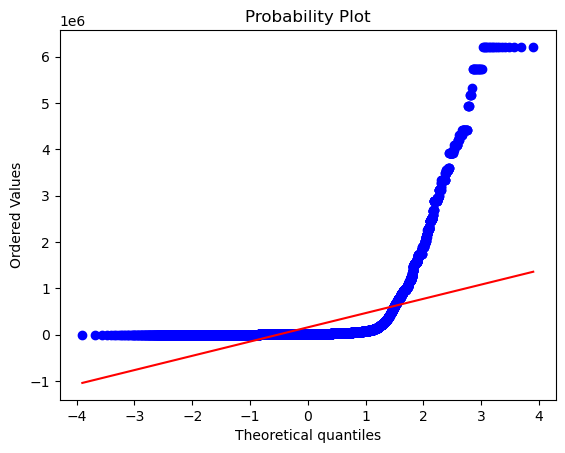

***************************************************************************************************************************************
The qq plot of columns is :cons_gas_12m


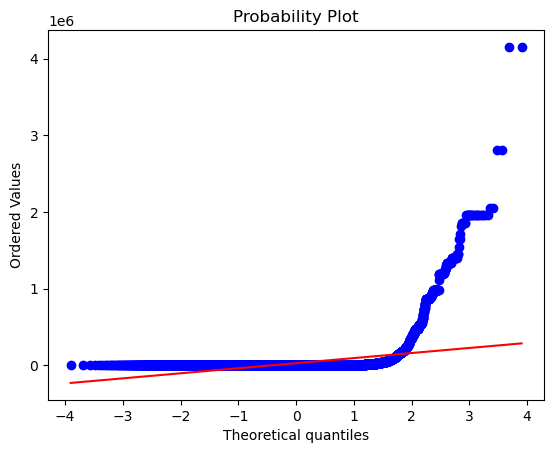

***************************************************************************************************************************************
The qq plot of columns is :cons_last_month


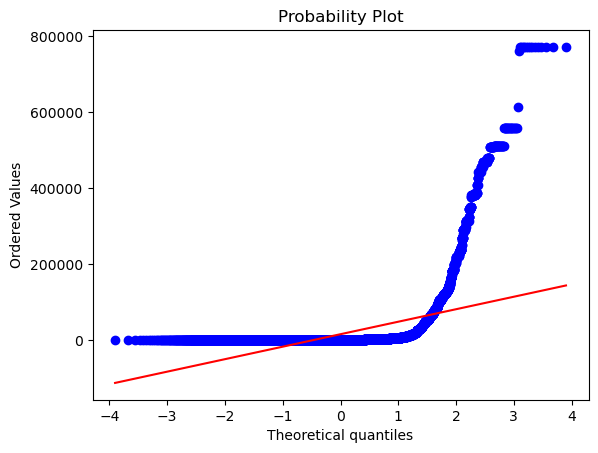

***************************************************************************************************************************************
The qq plot of columns is :forecast_cons_12m


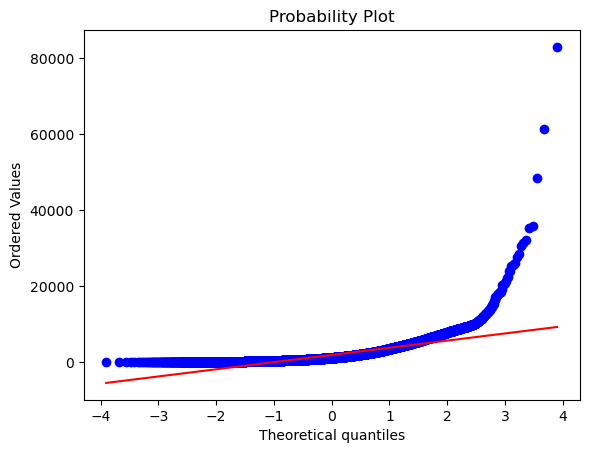

***************************************************************************************************************************************
The qq plot of columns is :forecast_cons_year


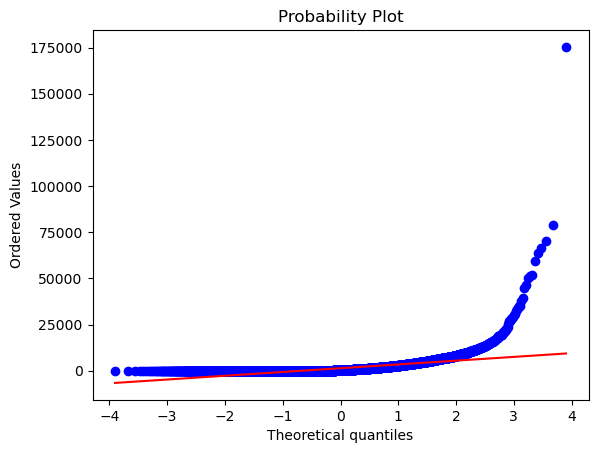

***************************************************************************************************************************************
The qq plot of columns is :forecast_discount_energy


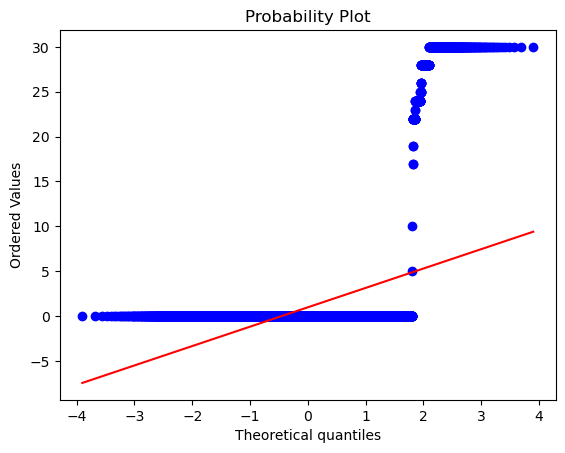

***************************************************************************************************************************************
The qq plot of columns is :forecast_meter_rent_12m


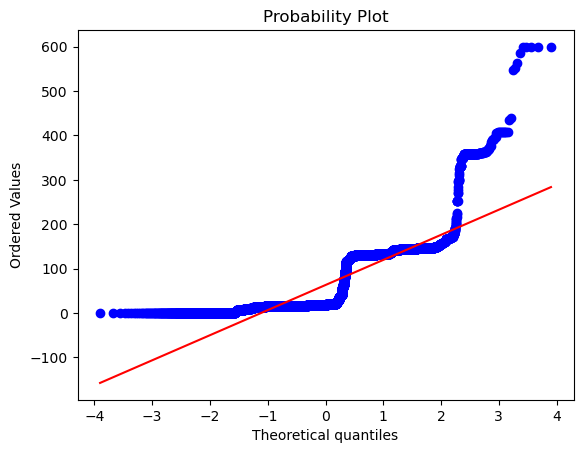

***************************************************************************************************************************************
The qq plot of columns is :forecast_price_energy_off_peak


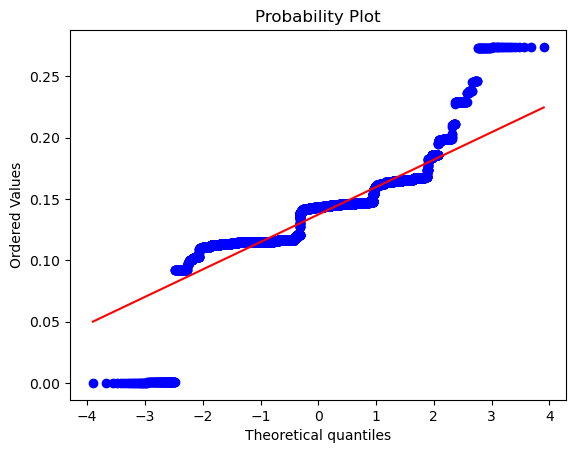

***************************************************************************************************************************************
The qq plot of columns is :forecast_price_energy_peak


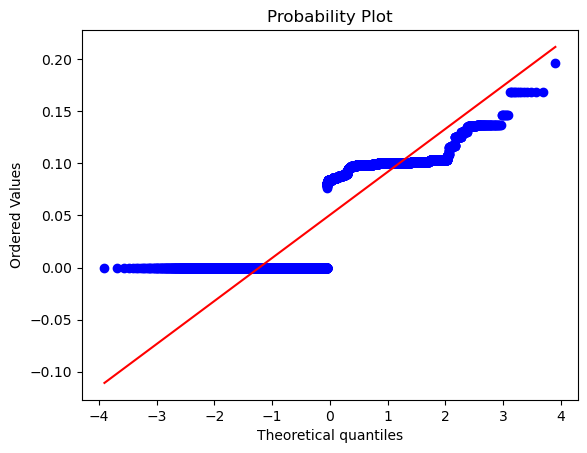

***************************************************************************************************************************************
The qq plot of columns is :forecast_price_pow_off_peak


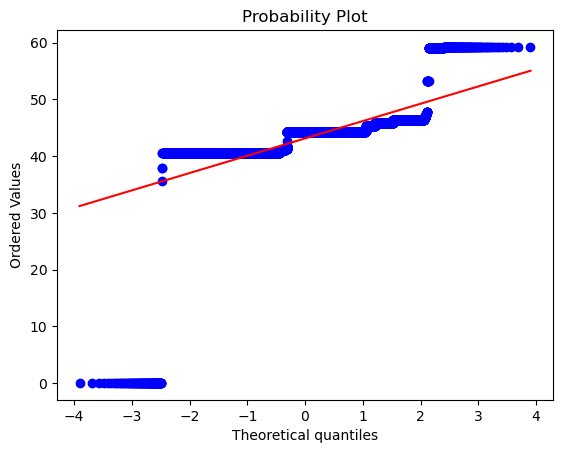

***************************************************************************************************************************************
The qq plot of columns is :imp_cons


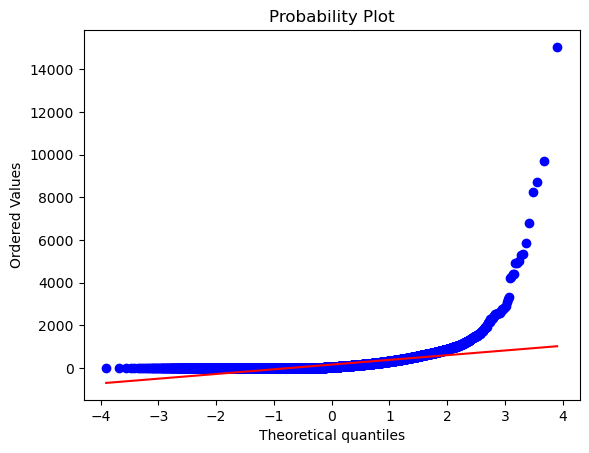

***************************************************************************************************************************************
The qq plot of columns is :margin_gross_pow_ele


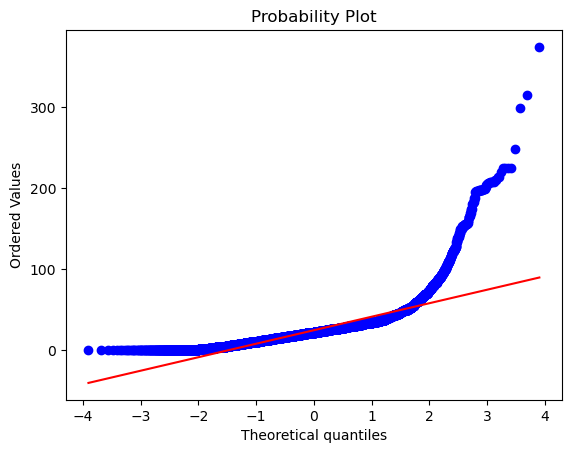

***************************************************************************************************************************************
The qq plot of columns is :margin_net_pow_ele


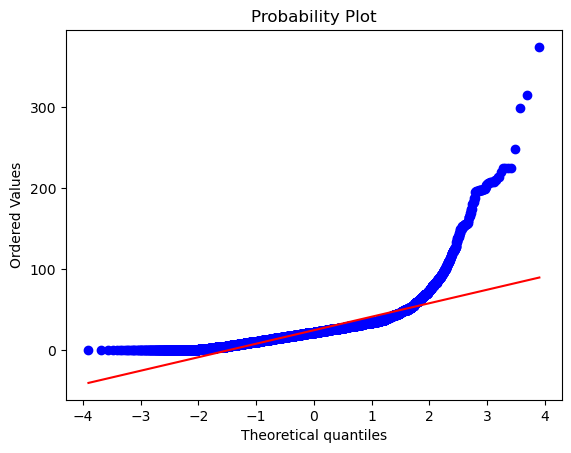

***************************************************************************************************************************************
The qq plot of columns is :nb_prod_act


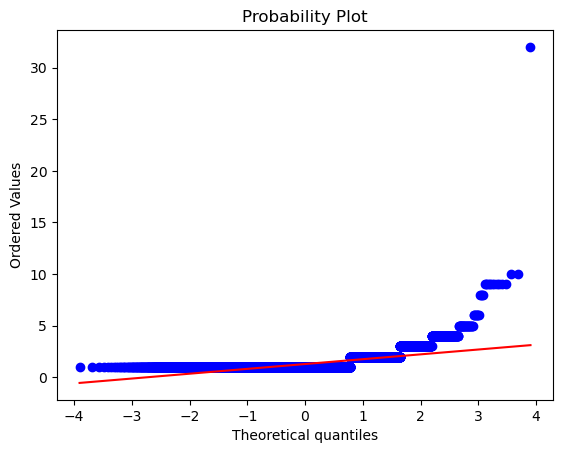

***************************************************************************************************************************************
The qq plot of columns is :net_margin


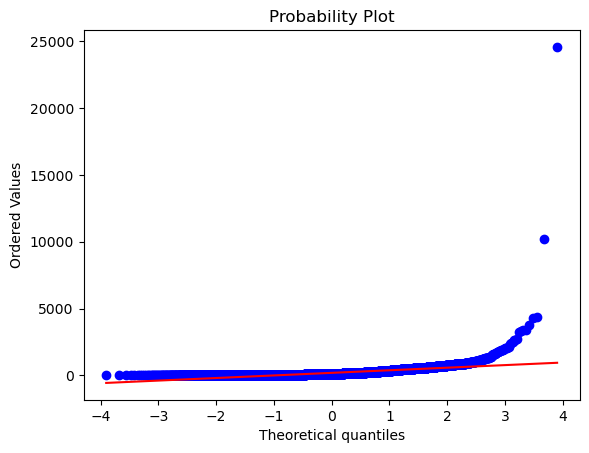

***************************************************************************************************************************************
The qq plot of columns is :num_years_antig


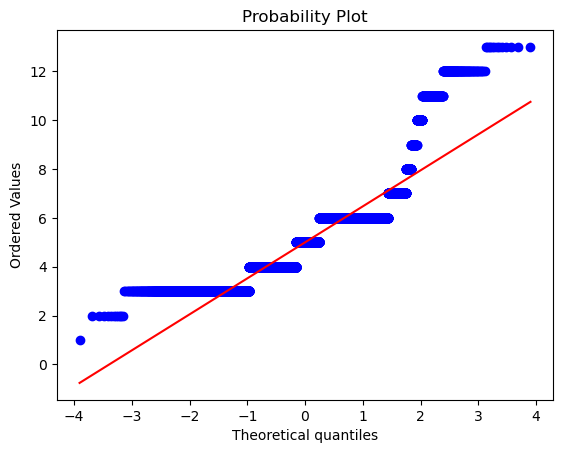

***************************************************************************************************************************************
The qq plot of columns is :pow_max


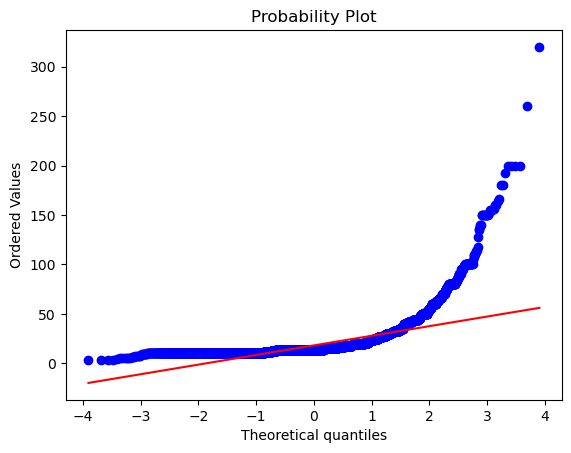

***************************************************************************************************************************************
The qq plot of columns is :churn


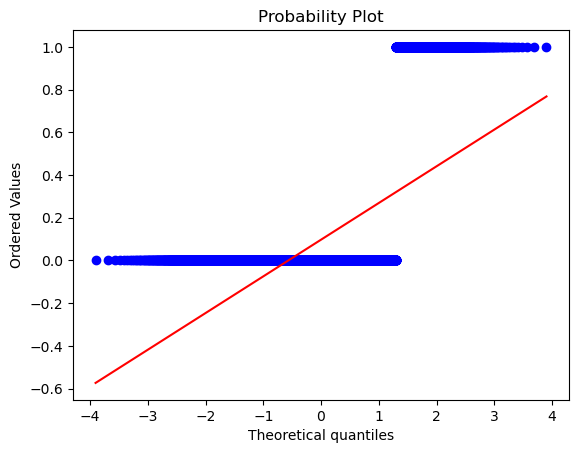

***************************************************************************************************************************************
The qq plot of columns is :active_year


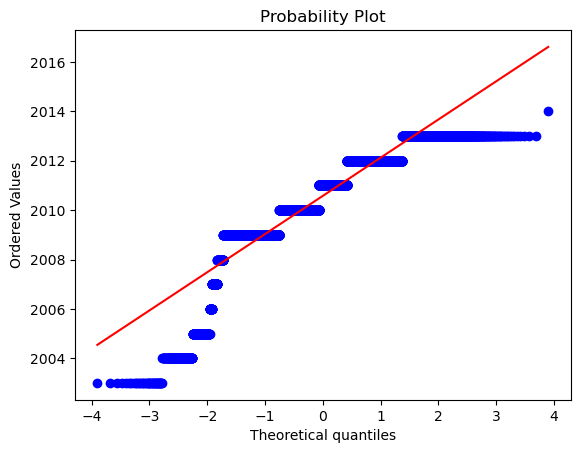

***************************************************************************************************************************************
The qq plot of columns is :active_month


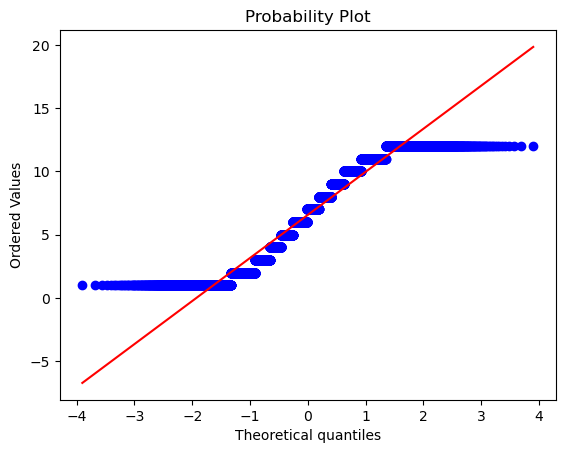

***************************************************************************************************************************************
The qq plot of columns is :active_day


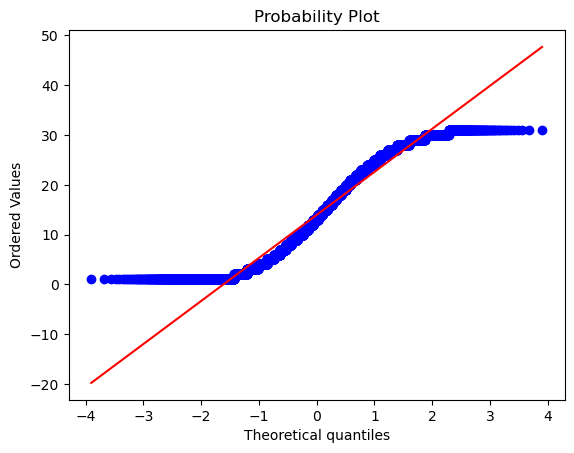

***************************************************************************************************************************************
The qq plot of columns is :end_year


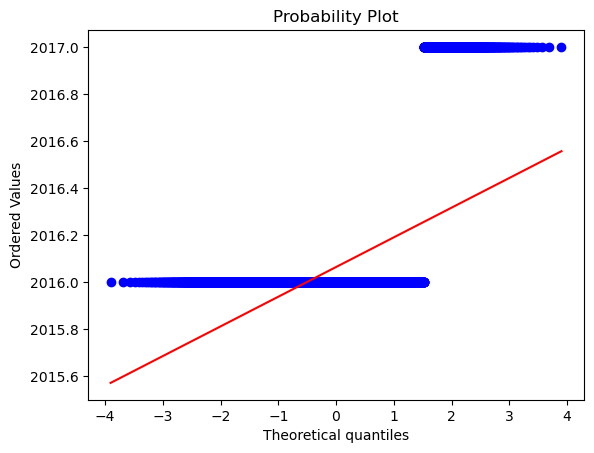

***************************************************************************************************************************************
The qq plot of columns is :end_month


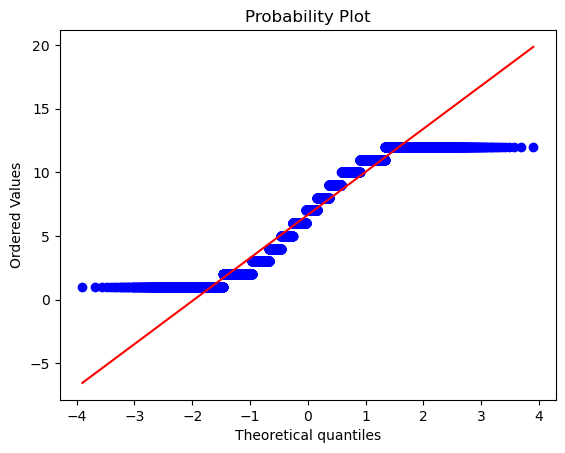

***************************************************************************************************************************************
The qq plot of columns is :end_day


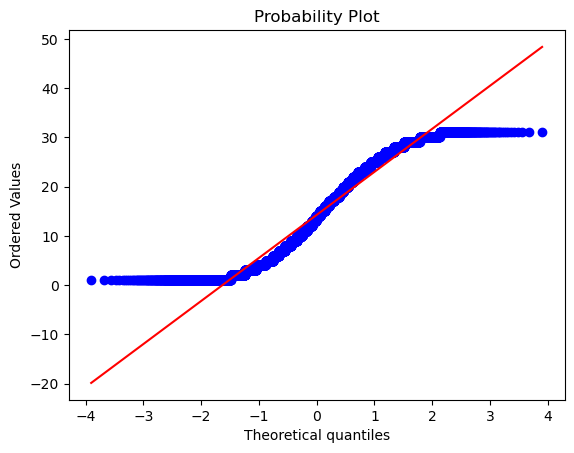

***************************************************************************************************************************************
The qq plot of columns is :Condition_modified_year


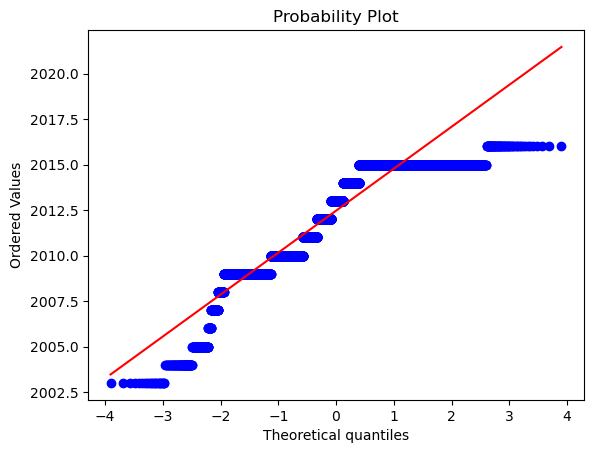

***************************************************************************************************************************************
The qq plot of columns is :Condition_modified_month


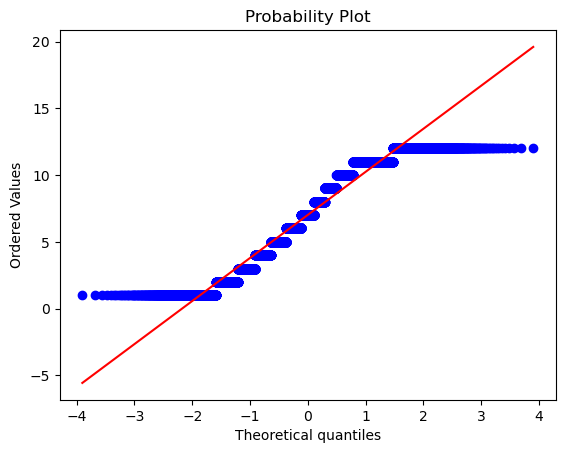

***************************************************************************************************************************************
The qq plot of columns is :Condition_modified_day


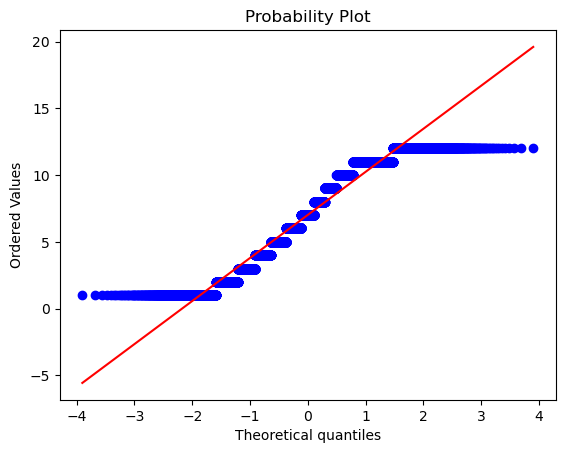

***************************************************************************************************************************************
The qq plot of columns is :Customer_renewal_year


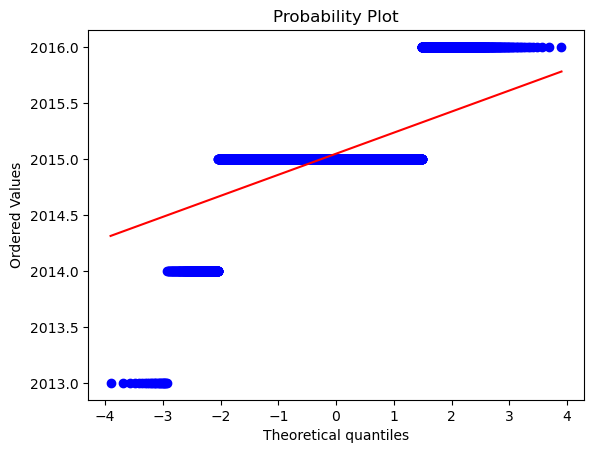

***************************************************************************************************************************************
The qq plot of columns is :Customer_renewal_month


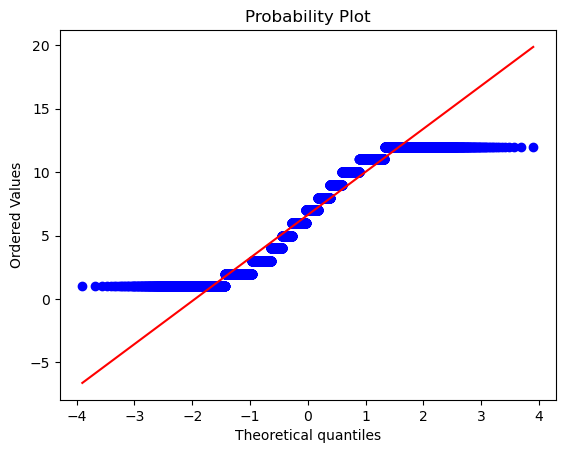

***************************************************************************************************************************************
The qq plot of columns is :Customer_renewal_day


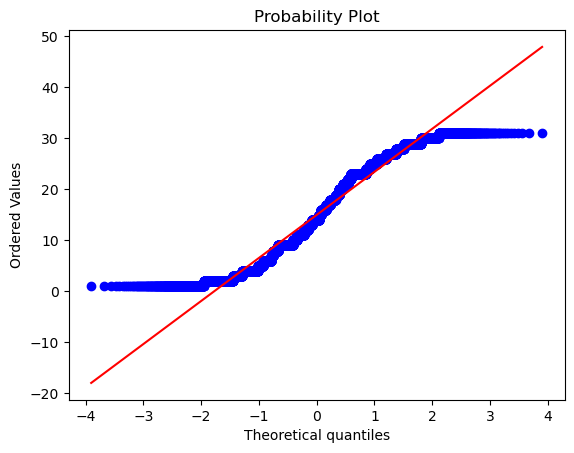

***************************************************************************************************************************************


In [66]:
client_drop_column=client.drop(columns=['id','channel_sales'])
numerical_columns=client_drop_column.select_dtypes(include='number')
for col in numerical_columns:
    stats.probplot(client[col],dist=stats.norm,plot=plt)
    print(f'The qq plot of columns is :{col}')
    plt.show()
    print("*********"*15)

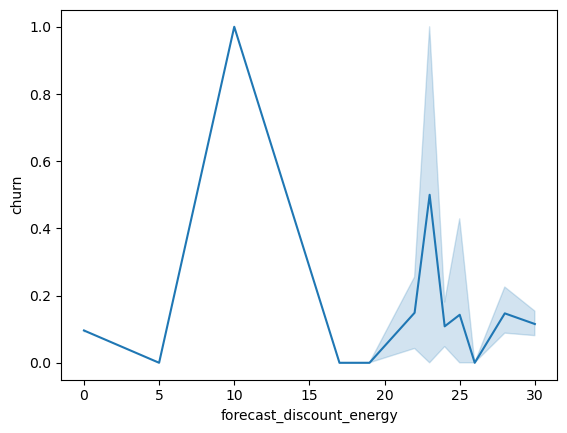

In [67]:
sns.lineplot(x=client['forecast_discount_energy'],y=client['churn'])
plt.show()

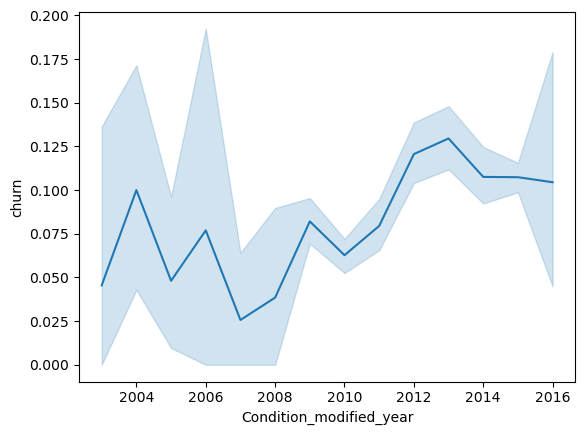

In [68]:
sns.lineplot(x=client['Condition_modified_year'],y=client['churn'])
plt.show()

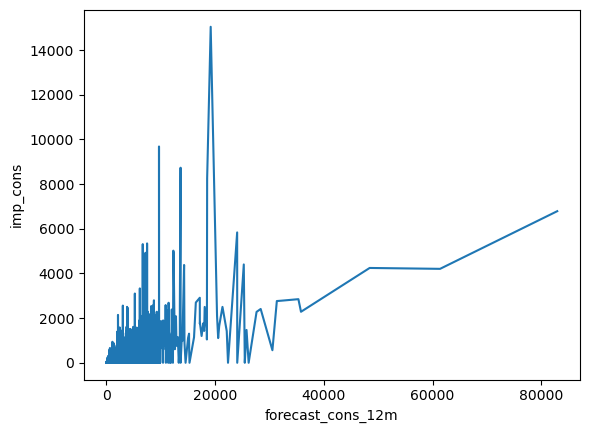

In [69]:
sns.lineplot(x=client['forecast_cons_12m'],y=client['imp_cons'])
plt.show()

In [70]:
data=pd.merge(price,client,on='id',how='inner')

In [71]:
data

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Year,Month,Day,...,active_day,end_year,end_month,end_day,Condition_modified_year,Condition_modified_month,Condition_modified_day,Customer_renewal_year,Customer_renewal_month,Customer_renewal_day
0,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,1,1,...,3,2016,6,3,2015,4,4,2015,6,14
1,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,2,1,...,3,2016,6,3,2015,4,4,2015,6,14
2,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,3,1,...,3,2016,6,3,2015,4,4,2015,6,14
3,038af19179925da21a25619c5a24b745,0.139437,0.000000,0.000000,3.812577,0.000000,0.000000,2015,4,1,...,3,2016,6,3,2015,4,4,2015,6,14
4,038af19179925da21a25619c5a24b745,0.139437,0.000000,0.000000,3.812577,0.000000,0.000000,2015,5,1,...,3,2016,6,3,2015,4,4,2015,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,8,1,...,1,2017,6,1,2015,11,11,2015,6,23
175145,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,9,1,...,1,2017,6,1,2015,11,11,2015,6,23
175146,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,10,1,...,1,2017,6,1,2015,11,11,2015,6,23
175147,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,11,1,...,1,2017,6,1,2015,11,11,2015,6,23


In [72]:
data.iloc[:,:10]

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Year,Month,Day
0,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,1,1
1,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,2,1
2,038af19179925da21a25619c5a24b745,0.140950,0.000000,0.000000,3.812577,0.000000,0.000000,2015,3,1
3,038af19179925da21a25619c5a24b745,0.139437,0.000000,0.000000,3.812577,0.000000,0.000000,2015,4,1
4,038af19179925da21a25619c5a24b745,0.139437,0.000000,0.000000,3.812577,0.000000,0.000000,2015,5,1
...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,8,1
175145,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,9,1
175146,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,10,1
175147,16f51cdc2baa19af0b940ee1b3dd17d5,0.113254,0.097337,0.073489,3.731194,3.236218,2.850218,2015,11,1


In [73]:
data.iloc[:,10:20]

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak
0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.50,630,0.0,19.59,0.14398,0.000000
1,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.50,630,0.0,19.59,0.14398,0.000000
2,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.50,630,0.0,19.59,0.14398,0.000000
3,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.50,630,0.0,19.59,0.14398,0.000000
4,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.50,630,0.0,19.59,0.14398,0.000000
...,...,...,...,...,...,...,...,...,...,...
175144,foosdfpfkusacimwkcsosbicdxkicaua,26272,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572
175145,foosdfpfkusacimwkcsosbicdxkicaua,26272,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572
175146,foosdfpfkusacimwkcsosbicdxkicaua,26272,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572
175147,foosdfpfkusacimwkcsosbicdxkicaua,26272,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572


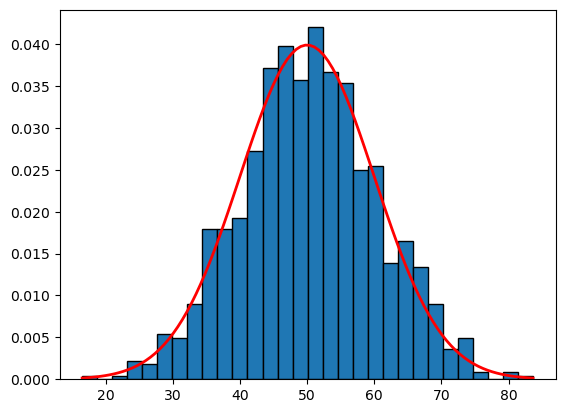

In [74]:
from scipy.stats import norm
distribution=np.random.normal(loc=50,scale=10,size=1000)
plt.hist(distribution,label=data,density=True,bins=30,edgecolor='black')
x=np.linspace(min(distribution),max(distribution),100)
y=norm.pdf(x,loc=50,scale=10)
plt.plot(x,y,color='red',linewidth=2)
plt.show()

In [75]:
data.columns

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'Year',
       'Month', 'Day', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'active_year', 'active_month', 'active_day', 'end_year', 'end_month',
       'end_day', 'Condition_modified_year', 'Condition_modified_month',
       'Condition_modified_day', 'Customer_renewal_year',
       'Customer_renewal_month', 'Customer_renewal_day'],
      dtype='object')

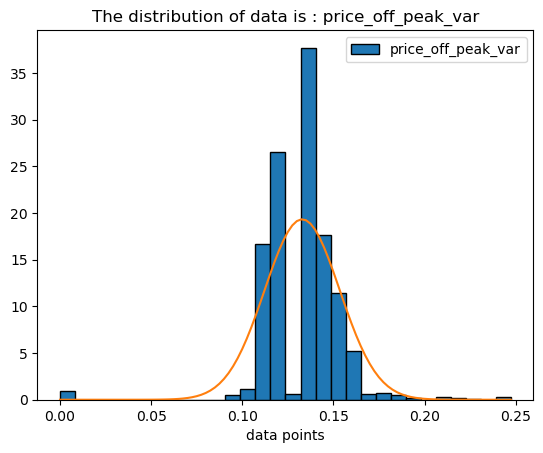

***************************************************************************


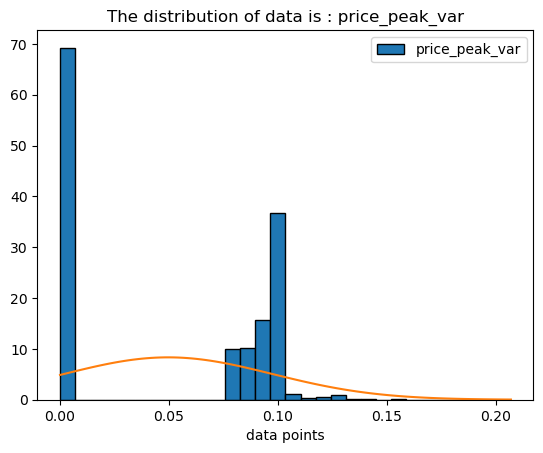

***************************************************************************


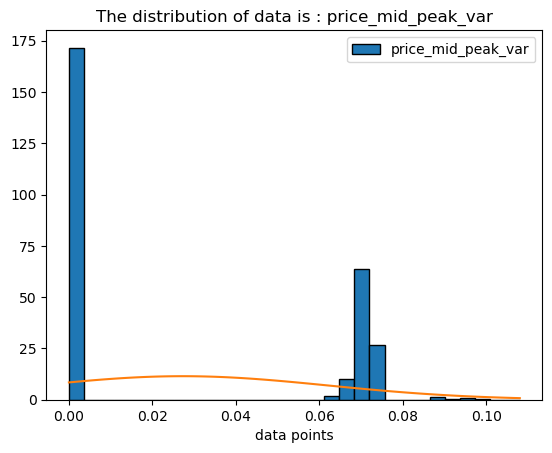

***************************************************************************


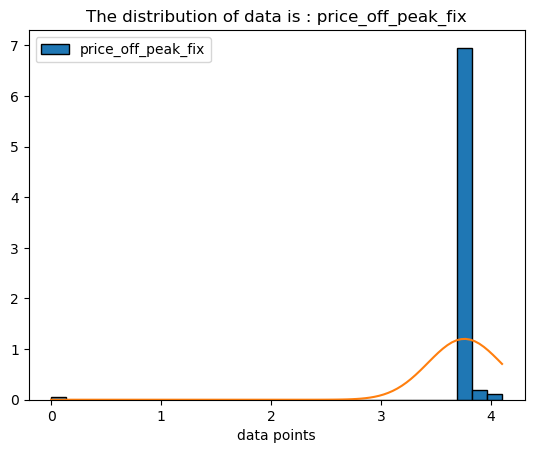

***************************************************************************


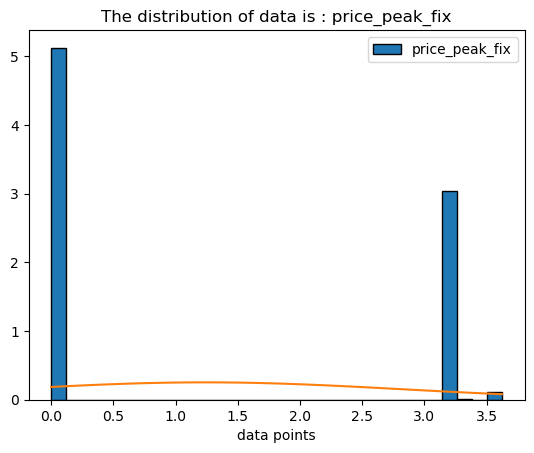

***************************************************************************


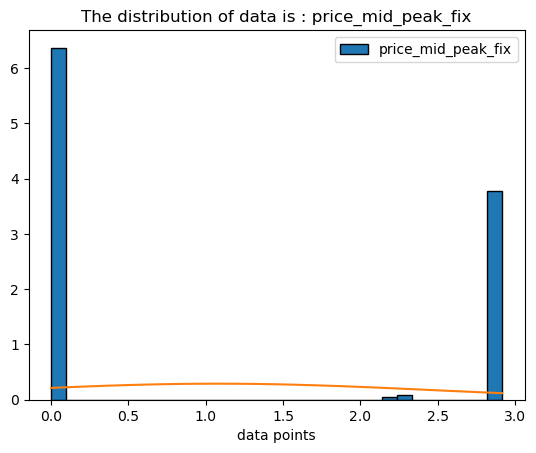

***************************************************************************


G:\anaconda installer_folder\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1988: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


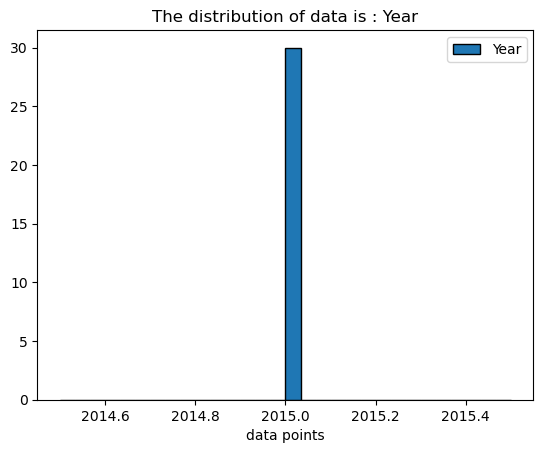

***************************************************************************


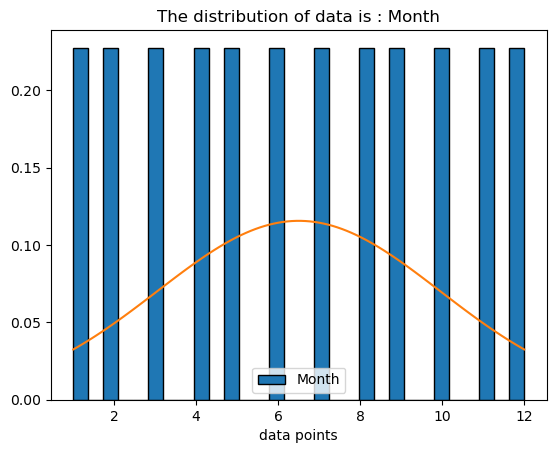

***************************************************************************


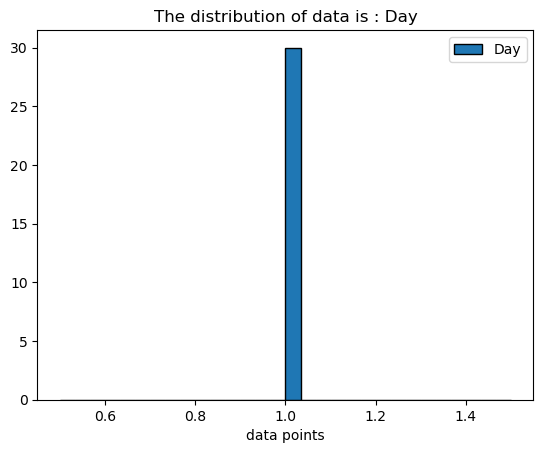

***************************************************************************


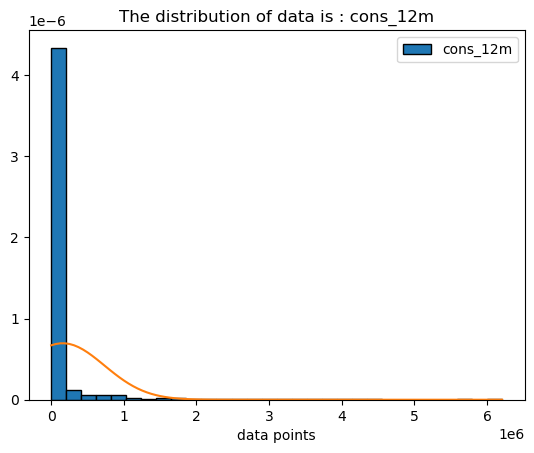

***************************************************************************


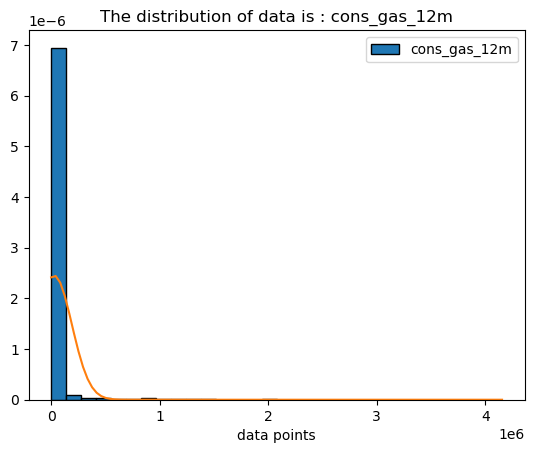

***************************************************************************


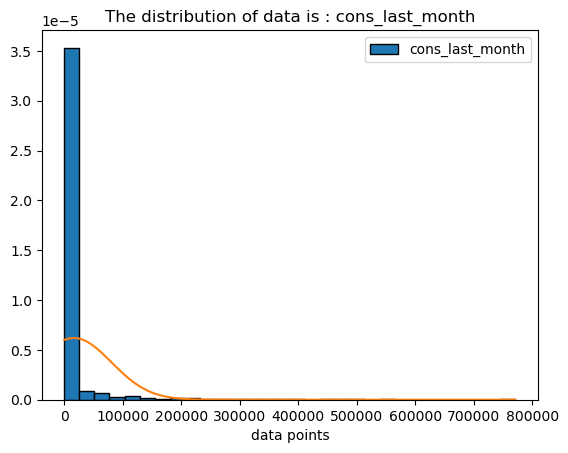

***************************************************************************


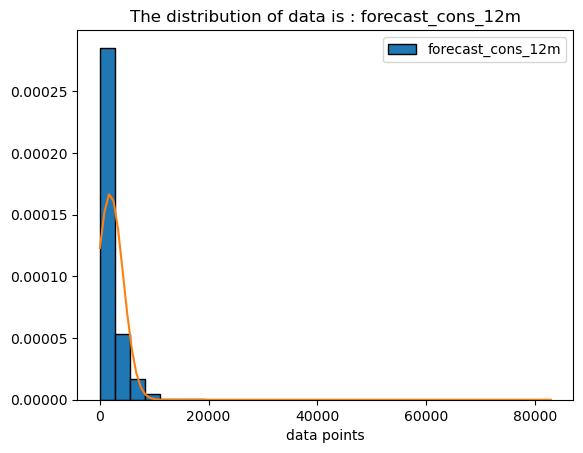

***************************************************************************


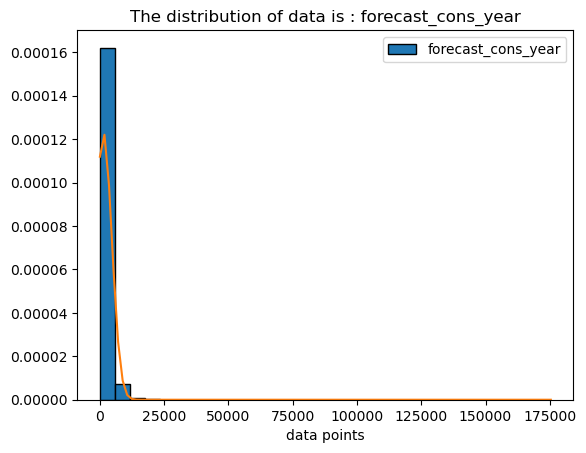

***************************************************************************


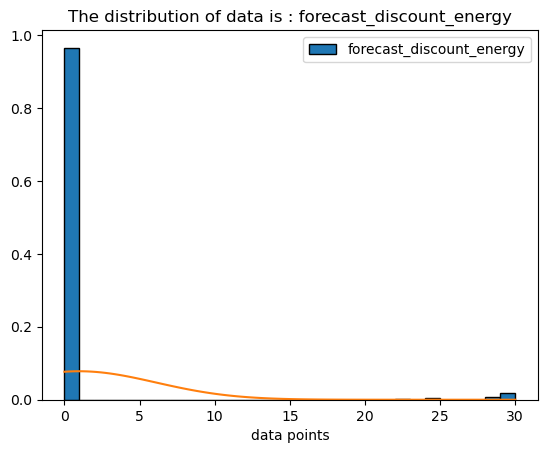

***************************************************************************


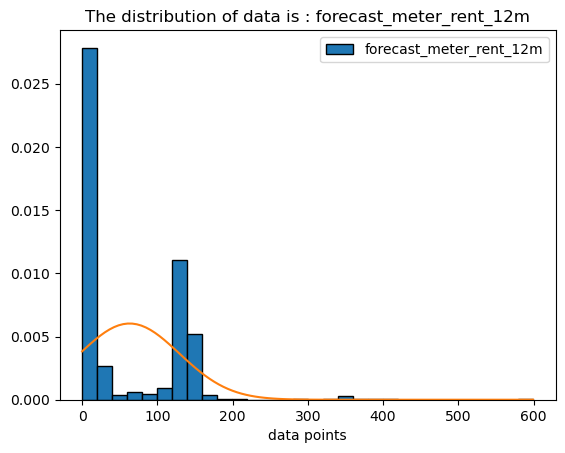

***************************************************************************


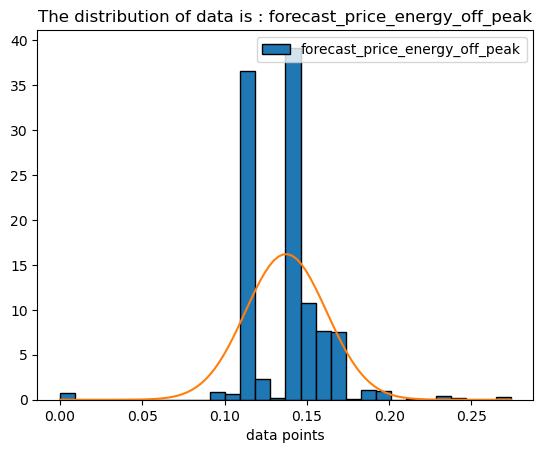

***************************************************************************


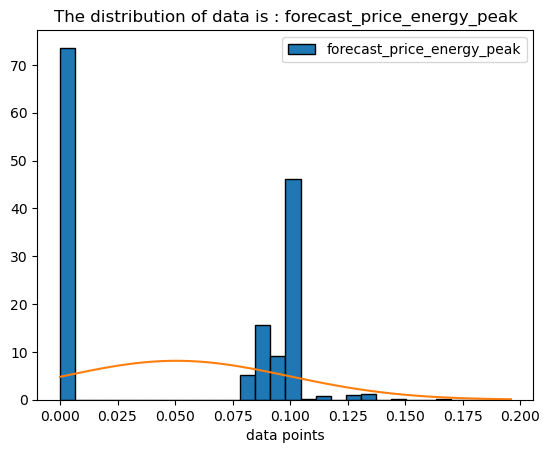

***************************************************************************


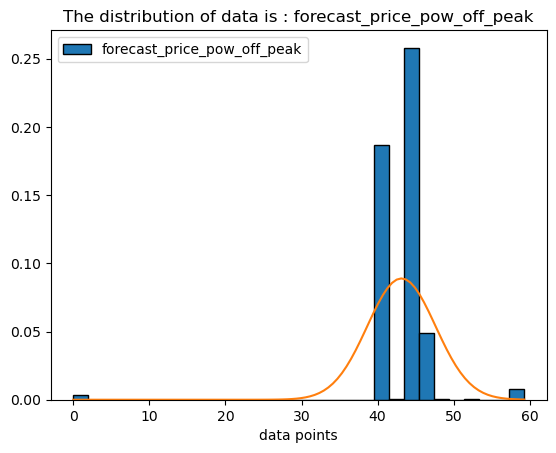

***************************************************************************


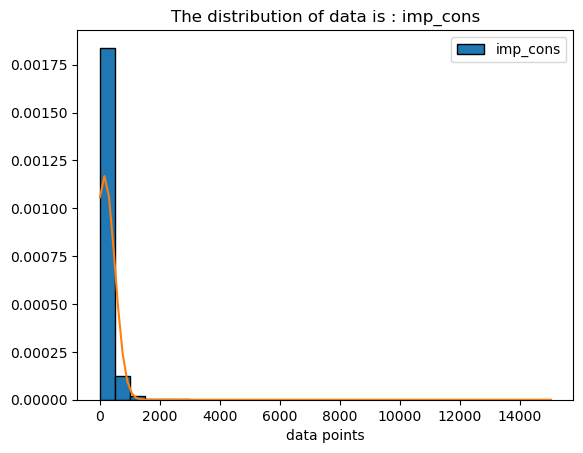

***************************************************************************


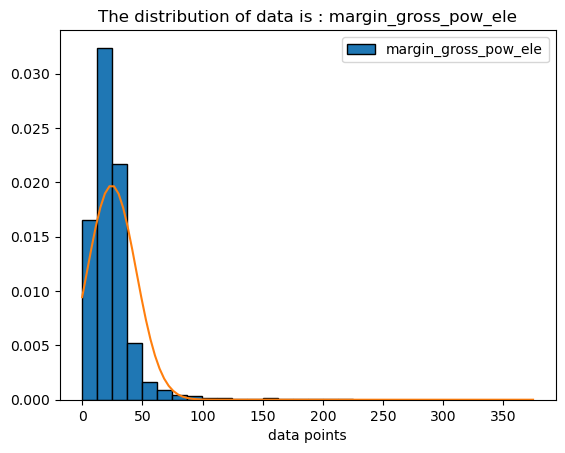

***************************************************************************


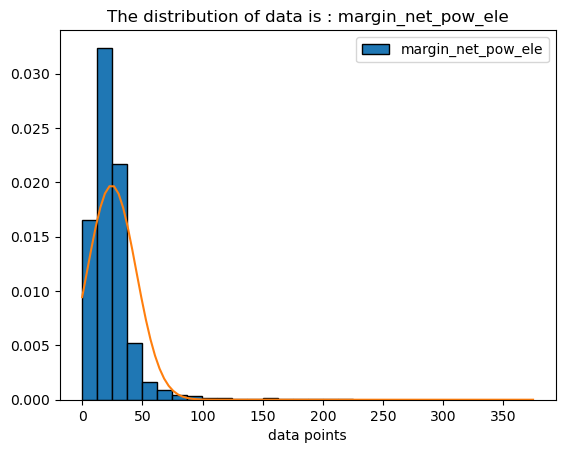

***************************************************************************


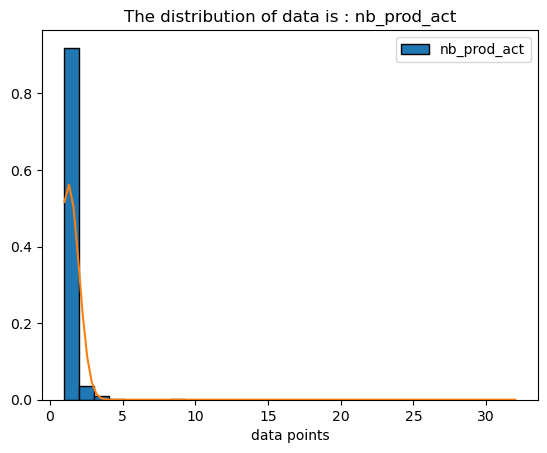

***************************************************************************


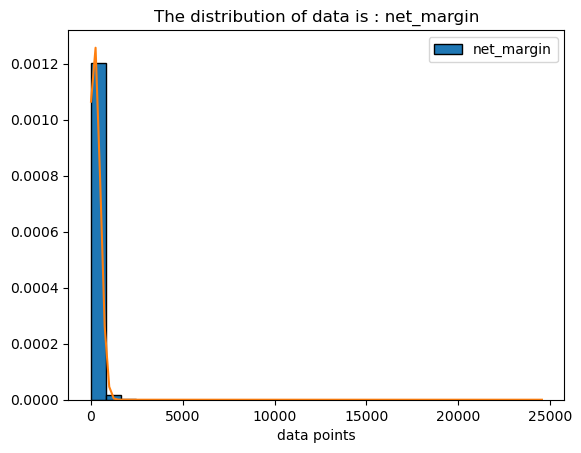

***************************************************************************


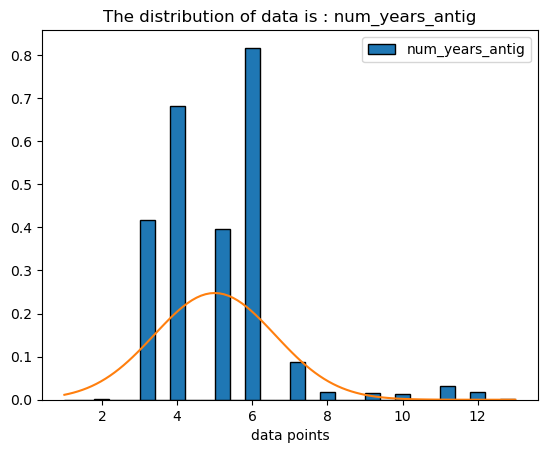

***************************************************************************


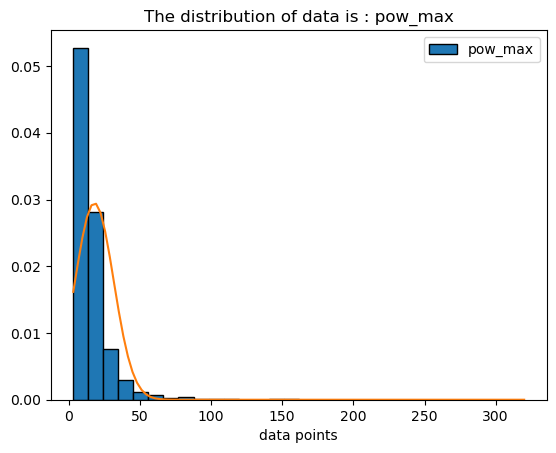

***************************************************************************


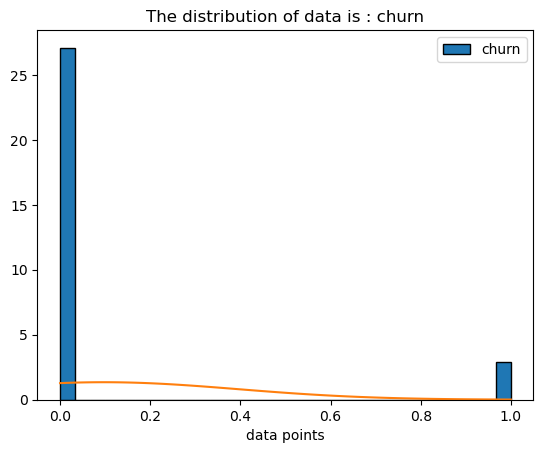

***************************************************************************


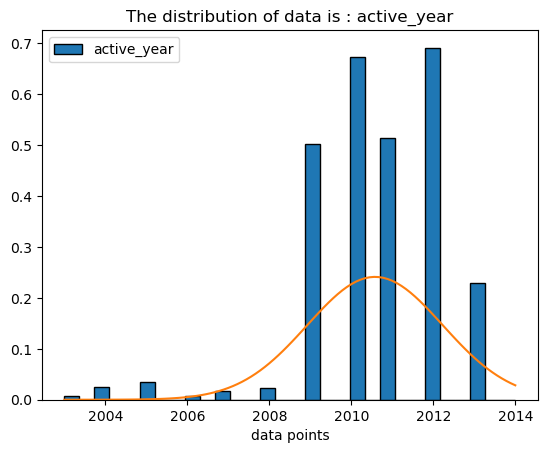

***************************************************************************


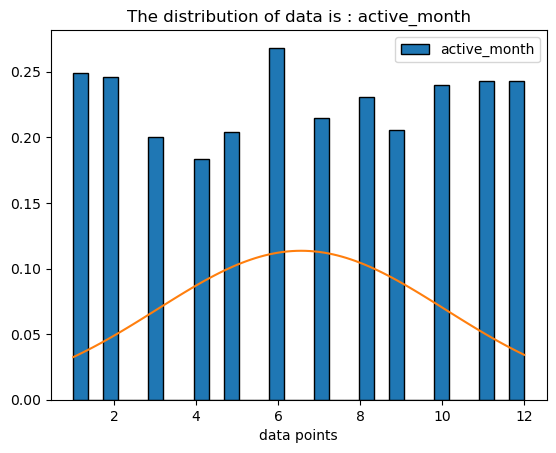

***************************************************************************


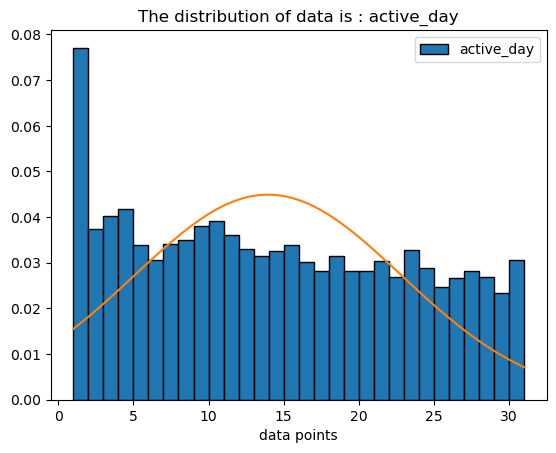

***************************************************************************


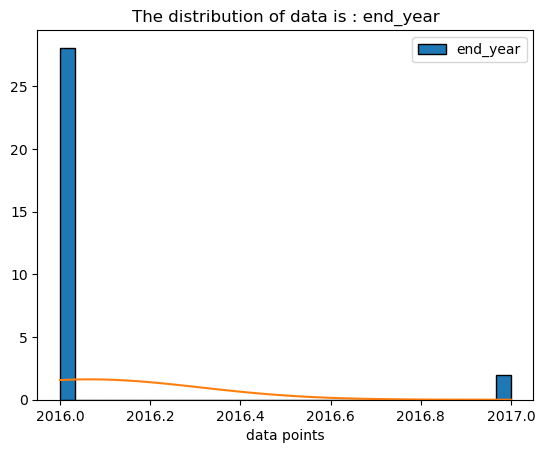

***************************************************************************


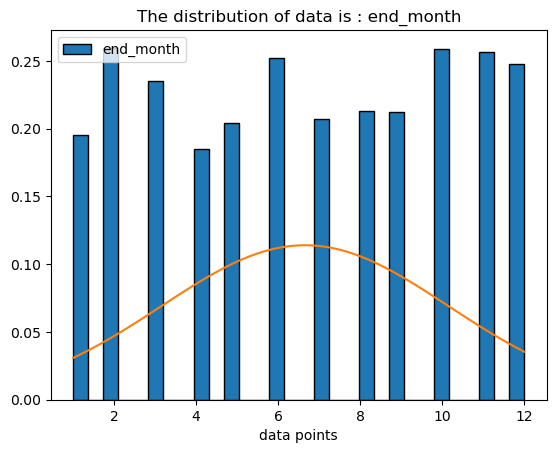

***************************************************************************


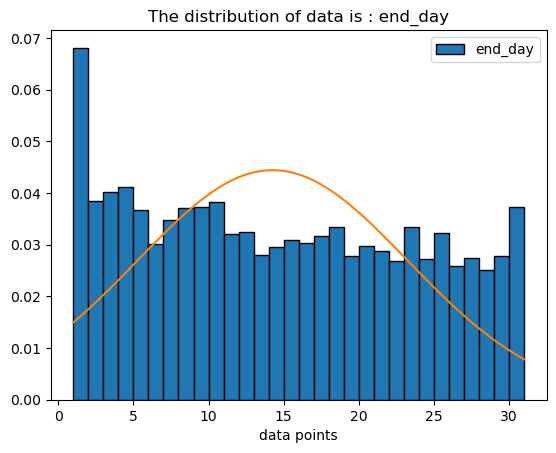

***************************************************************************


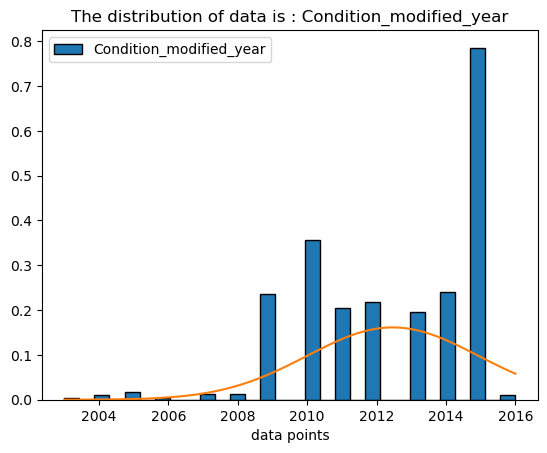

***************************************************************************


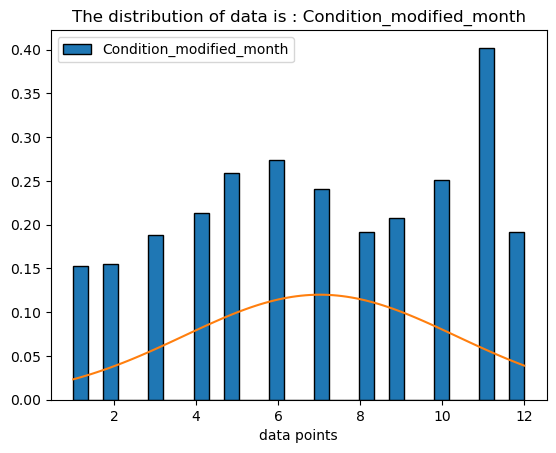

***************************************************************************


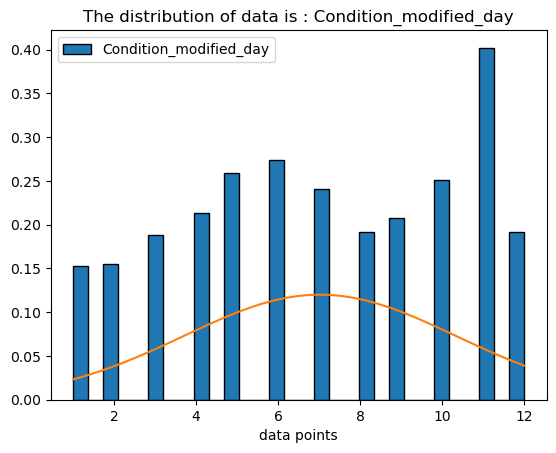

***************************************************************************


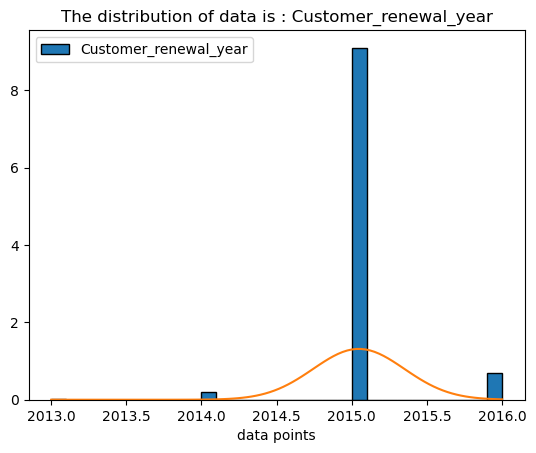

***************************************************************************


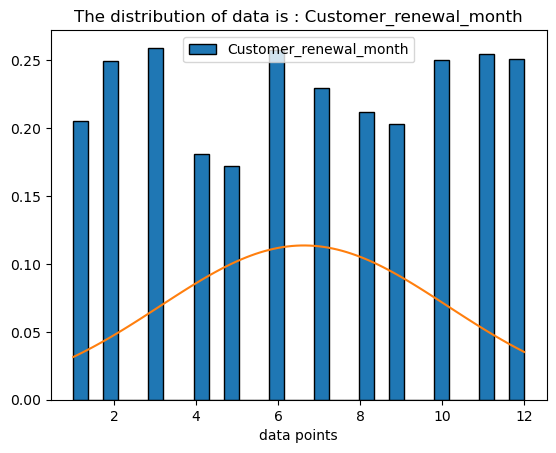

***************************************************************************


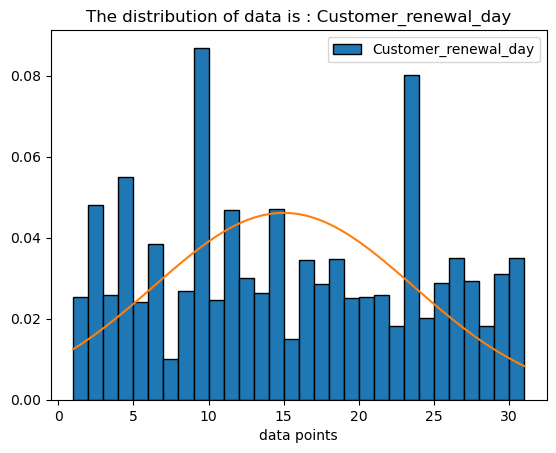

***************************************************************************


In [76]:
numerical_columns=data.select_dtypes(include='number')
for col in numerical_columns:
    plt.hist(data[col],density=True,label=col,bins=30,edgecolor='black')
    x=np.linspace(data[col].min(),data[col].max(),100)
    y=norm.pdf(x,data[col].mean(),data[col].std())
    plt.plot(x,y)
    plt.title(f'The distribution of data is : {col}')
    plt.xlabel('data points') 
    plt.legend()
    plt.show()
    print("*****"*15)

# Observation
We identified normality of data distribution by using histplot

We came to know very few features are normaly distributed remaing features are not normally distributed


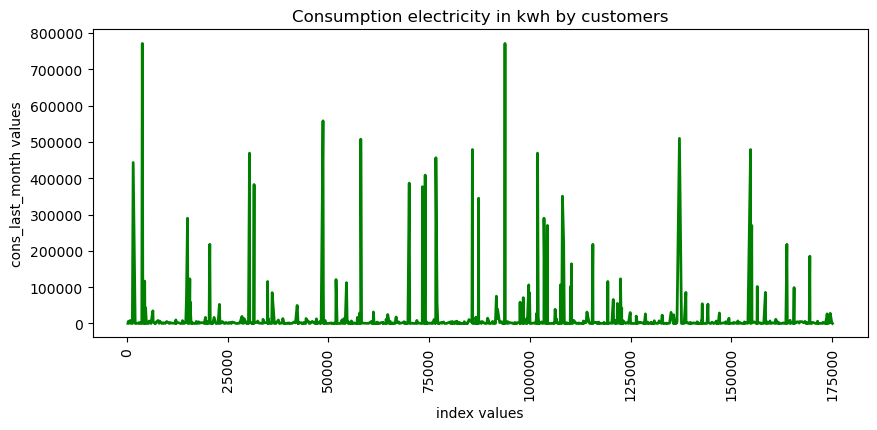

In [189]:
sample_data=data.sample(1000)
plt.figure(figsize=(10,4))
sns.lineplot(x=sample_data.index,y=sample_data['cons_last_month'],linewidth=2,color='green')
plt.xticks(rotation=90)
plt.title('Consumption electricity in kwh by customers')
plt.xlabel('index values')
plt.ylabel('cons_last_month values')
plt.show()

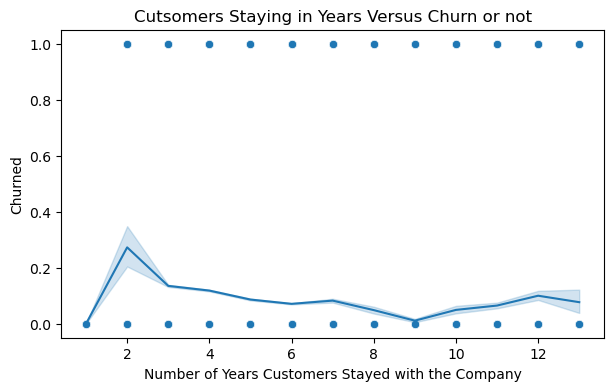

In [254]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=data['num_years_antig'],y=data['churn'])
sns.lineplot(x=data['num_years_antig'],y=data['churn'])
plt.title("Cutsomers Staying in Years Versus Churn or not")
plt.xlabel("Number of Years Customers Stayed with the Company")
plt.ylabel("Churned")
plt.show()


# Onservation
The blue line shows the average churn rate. Most customers are staying, meaning they are okay with the connection.

A spike is seen between 8.5 to 12 years, and 0 to 2.5 years where many customers left the connection.

The shadow shows variability, which is higher near the spike, meaning churn behavior is inconsistent there

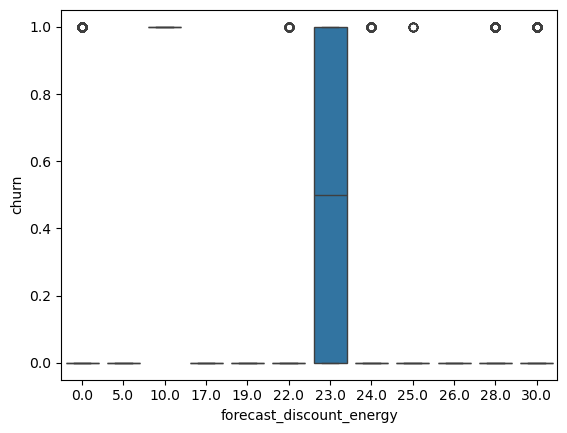

In [287]:
sns.boxplot(x='forecast_discount_energy',y='churn',data=data)
plt.show()

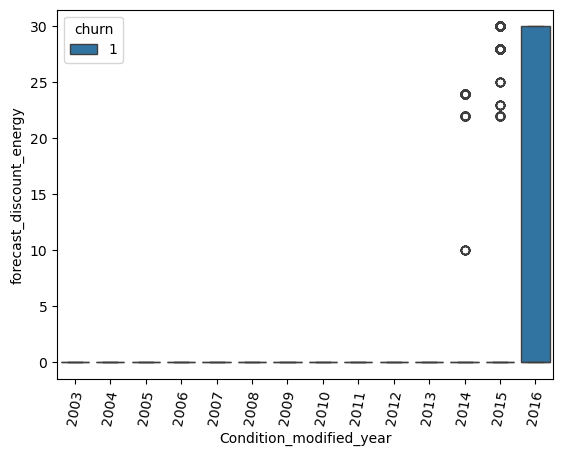

In [462]:
removed_connection=data.groupby('churn').get_group(1)
condition_modified=removed_connection[['Condition_modified_year','num_years_antig','forecast_discount_energy','churn']]
after_condition_modified=condition_modified.sort_values(by=['Condition_modified_year','num_years_antig','forecast_discount_energy']\
                                                    ,ascending=[False,False,False])
new_data=after_condition_modified
sns.boxplot(x='Condition_modified_year',y='forecast_discount_energy',hue='churn',data=new_data)
plt.xticks(rotation=80)
plt.show()

# Observation
Customers might have been attracted by discounts but were not satisfied with the product or service, leading to churn once the discount was no longer available.

Discounts might have created higher expectations, and when those expectations weren’t met, customers decided to leave.

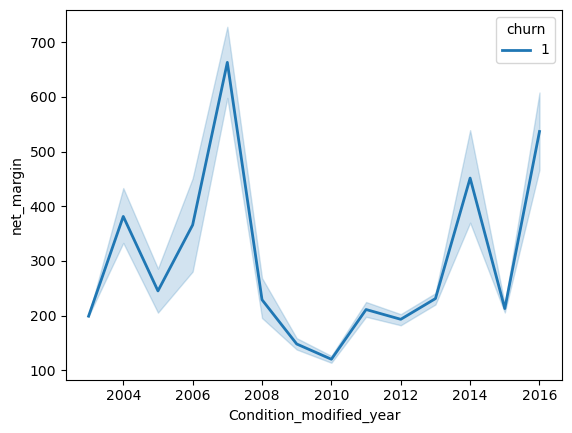

In [594]:
exist_members=data[data['churn']==1]
new_data=exist_members[['Condition_modified_year','net_margin','churn']]
sns.lineplot(x='Condition_modified_year',y='net_margin',hue='churn',data=new_data,linewidth=2)
plt.show()

# Observation

The revenue is dropped in between 2007 to 2010 May be in this year the company lost most of the customers due to conditions changed

soo most impacted year is 2010 it seems maybe company polices or prices have incresed

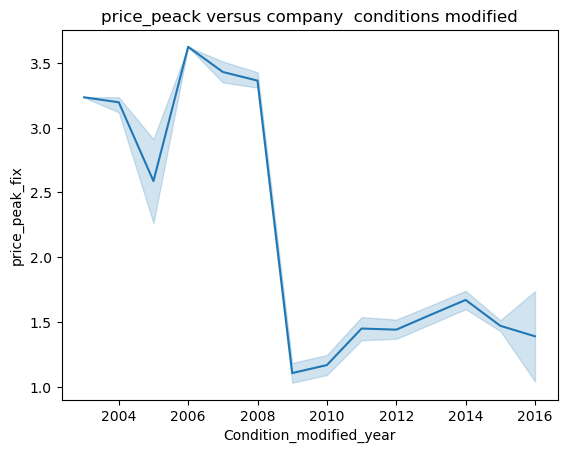

In [622]:
new_churn=data[data['churn']==1]
condition_price=new_churn[['Condition_modified_year','price_peak_fix']]
graph=sns.lineplot(x='Condition_modified_year',y='price_peak_fix',data=condition_price)
graph.yaxis.get_major_formatter().set_useOffset(False)
plt.title("price_peack versus company  conditions modified")
plt.show()

# Observation
We are predicted before 2004 to 20008 the customere are stayed with the company

When the prices are increases or fixed prices the customere are un happy with company soo they have dropped they connections suddenly

soo  in 2009 to 2014 there is huge loss of customers

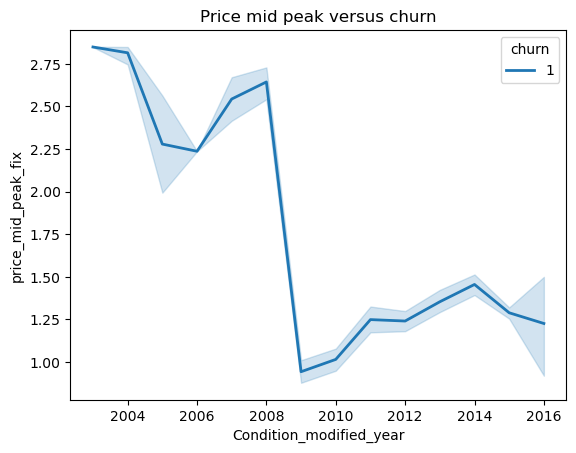

In [654]:
churn_data=data[data['churn']==1]
new_data=churn_data[['price_mid_peak_fix','Condition_modified_year','Condition_modified_month','churn']]
sns.lineplot(x='Condition_modified_year',y='price_mid_peak_fix',hue='churn',data=new_data,linewidth=2)
plt.title("Price mid peak versus churn")
plt.show()

# Observation
In 2004 the power price is increases soo after two years (2008) there is more drop down of customeres where churn equal to 1

May be the price impact to drop the customers

Then slowly start increasing in 2010 but it is not stable may be new users are joining the company for gas or electricity after one year they are leaving the company 

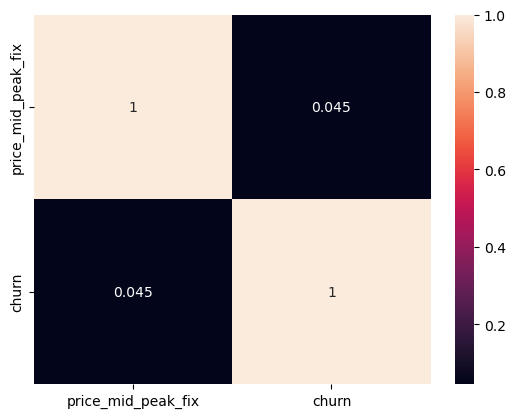

In [664]:
relation=data[['price_mid_peak_fix','churn']].corr()
sns.heatmap(relation,annot=True)
plt.show()

<Axes: xlabel='cons_gas_12m', ylabel='Count'>

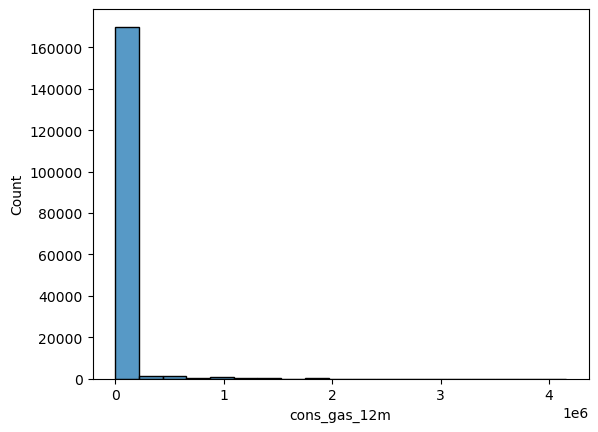

In [684]:
sns.histplot(x=data['cons_gas_12m'])

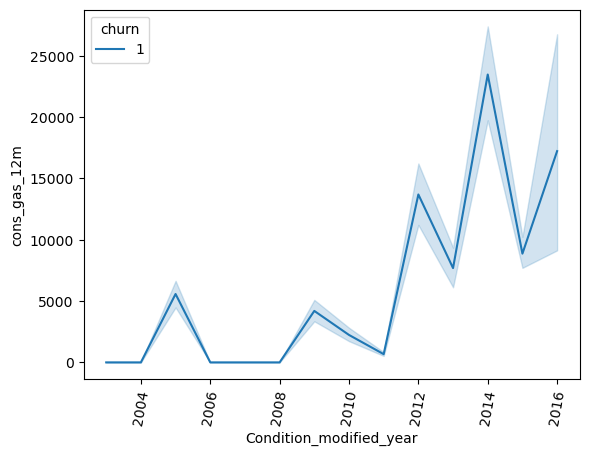

In [730]:
new_churn=data[data['churn']==1]
new_data=new_churn[['cons_gas_12m','forecast_discount_energy','churn','Condition_modified_year']]
sns.lineplot(x='Condition_modified_year',y='cons_gas_12m',hue='churn',data=new_data)
plt.xticks(rotation=80)
plt.show()

# Observation
The customers who leave the connection for gas they got less discount in the year 2006 to 2008 then i has increases 

From 2012 to 2016 the discount is stable 

Based on our analysis the discount is not much impact on customers out of connections

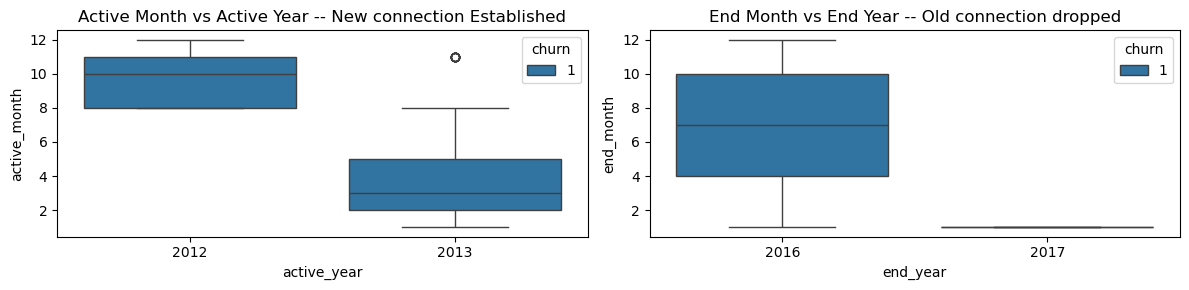

In [864]:
fig,axes=plt.subplots(1,2,figsize=(12,3))
churn_data=data[(data['churn']==1) & (data['num_years_antig']<=3)]
new_churn=churn_data[['active_month','active_year','end_month','end_year','churn','num_years_antig']]
sns.boxplot(x='active_year',y='active_month',hue='churn',data=new_churn,ax=axes[0])
axes[0].set_title('Active Month vs Active Year -- New connection Established')
sns.boxplot(x='end_year',y='end_month',hue='churn',data=new_churn,ax=axes[1])
axes[1].set_title("End Month vs End Year -- Old connection dropped")
plt.tight_layout()
plt.show()

# Observation
Most of the people leaved the company they belong to year 2012 and 2013

Based on our analysis in 2012 the customere are adopted the new connection in the month of 8 to 12

Based on our analysis in 2013 the customers are adopted the new connection in the month of 1 to 8 months 

Most of connections are dropped in the year 2016  from 2 to 12 months at this point the customers are staying 3 years with company

# reasons
Our analysis Discount is good soo this feature is not impacted the churn of customers

The company conditions about price mid peack and price fix is impacting more in the year 2009 soo suddenly break is happen in company
soo this might be impacted on the year 2012 to 2013 newly joined customers soo they have dropped in the year 2016 majority 






# Training Datset

In [881]:
X=data.drop(columns=['id','churn','channel_sales','origin_up'])
X.shape

(175149, 39)

y=data['churn']
y.shape

In [885]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(131361, 39)
(131361,)
(43788, 39)
(43788,)


In [892]:
X_train_numerical=X_train.select_dtypes(include='number')
X_test_numerical=X_test.select_dtypes(include='number')
X_train_categorical=X_train.select_dtypes(include='object')
X_test_categorical=X_test.select_dtypes(include='object')
print(X_train_numerical.shape)
print(X_test_numerical.shape)
print(X_train_categorical.shape)
print(X_test_categorical.shape)

(131361, 38)
(43788, 38)
(131361, 1)
(43788, 1)


# Applying Standard Scaler

In [901]:
from sklearn.preprocessing import StandardScaler
scaler_model=StandardScaler()
X_train_numerical_transform=scaler_model.fit_transform(X_train_numerical)
X_test_numerical_transform=scaler_model.transform(X_test_numerical)
print(X_train_numerical_transform.shape)
print(X_test_numerical_transform.shape)

(131361, 38)
(43788, 38)


# Applying Ordinal Encoder

In [906]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_model=OrdinalEncoder()
X_train_categorical_transform=ordinal_model.fit_transform(X_train_categorical)
X_test_categorical_transform=ordinal_model.transform(X_test_categorical)
print(X_train_categorical_transform.shape)
print(X_test_categorical_transform.shape)

(131361, 1)
(43788, 1)


# Concatenating traing data and test data

In [1022]:
X_train_data=np.concatenate([X_train_numerical_transform,X_train_categorical_transform],axis=1)
X_test_data=np.concatenate([X_test_numerical_transform,X_test_categorical_transform],axis=1)

In [1024]:
X_train_frame=pd.DataFrame(X_train_data)
X_test_frame=pd.DataFrame(X_test_data)

In [1036]:
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor()
forest_model.fit(X_train_frame,y_train)

RandomForestRegressor()

In [1053]:
from sklearn.metrics import mean_squared_error
y_predict=forest_model.predict(X_test_frame)
score=mean_squared_error(y_test,y_predict)
print(f'The accuracy score of Random Forest Algorith for Regression model is : {score}')

The accuracy score of Random Forest Algorith for Regression model is : 8.568785968758565e-05


In [1063]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest_model = RandomForestClassifier()
forest_model.fit(X_train_frame, y_train)
y_predict = forest_model.predict(X_test_frame)
accuracy = accuracy_score(y_test, y_predict)
print(f'The accuracy score of Random Forest Algorithm for Classification model is : {accuracy}')

The accuracy score of Random Forest Algorithm for Classification model is : 0.9999771626929752


In [1065]:
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)